In [1]:
import pandas as pd

pd.set_option('display.max_rows', 10)              # REMOVELINE 
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)

In [2]:
df

Seq.          President                  Party  Bg  Im  Int  IQ   L  WR  \
1     1  George Washington            Independent   7   7    1  10   1   6   
2     2         John Adams             Federalist   3  13    4   4  24  14   
3     3   Thomas Jefferson  Democratic-Republican   2   2   14   1   8   5   
4     4      James Madison  Democratic-Republican   4   6    7   3  16  15   
5     5       James Monroe  Democratic-Republican   9  14   11  18   6  16   
..  ...                ...                    ...  ..  ..  ...  ..  ..  ..   
40   41  George H. W. Bush             Republican  10  27   18  19  20  27   
41   42       Bill Clinton             Democratic  21  12   39   8  11  17   
42   43     George W. Bush             Republican  17  29   33  41  21  20   
43   44       Barack Obama             Democratic  24  11   13   9  15  23   
44   45       Donald Trump             Republican  43  40   44  44  10  25   

    AC  ...  PL  RC  CAp  HE  EAp  DA  FPA  AM  EV   O  
1    2  ...  18   1    1   1    1   2    2   1   2   1  
2   31  ...  28  17    4  13   15  19   13  16  10  14  
3   14  ...   5   5    7  20    4   6    9   7   5   5  
4    6  ...   9  10    6  14    7  11   19  11   8   7  
5    7  ...  12   8   11   9    9  10    5   6   9   8  
..  ..  ...  ..  ..  ...  ..  ...  ..  ...  ..  ..  ..  
40  13  ...  21  20   29  28   19  26   10  17  21  21  
41   3  ...  13  18   10   5   12   9   18  30  14  15  
42  28  ...  19  22   28  36   29  30   38  36  34  33  
43  16  ...  23  31   14  10   13  13   20  10  11  17  
44  42  ...  43  42   40  39   44  40   42  41  42  42  

[44 rows x 24 columns]

In [3]:
df.dtypes

Seq.         object
President    object
Party        object
Bg            int64
Im            int64
              ...  
DA            int64
FPA           int64
AM            int64
EV            int64
O             int64
Length: 24, dtype: object

In [4]:
def tweak_siena_pres(df):
    def int64_to_uint8(df_):
        cols = df_.select_dtypes('int64')
        return (df_
                .astype({col:'uint8' for col in cols}))


    return (df
     .rename(columns={'Seq.':'Seq'})    # 1
     .rename(columns={k:v.replace(' ', '_') for k,v in
        {'Bg': 'Background',
         'PL': 'Party leadership', 'CAb': 'Communication ability',
         'RC': 'Relations with Congress', 'CAp': 'Court appointments',
         'HE': 'Handling of economy', 'L': 'Luck',
         'AC': 'Ability to compromise', 'WR': 'Willing to take risks',
         'EAp': 'Executive appointments', 'OA': 'Overall ability',
         'Im': 'Imagination', 'DA': 'Domestic accomplishments',
         'Int': 'Integrity', 'EAb': 'Executive ability',
         'FPA': 'Foreign policy accomplishments',
         'LA': 'Leadership ability',
         'IQ': 'Intelligence', 'AM': 'Avoid crucial mistakes',
         'EV': "Experts' view", 'O': 'Overall'}.items()})
     .astype({'Party':'category'})  # 2
     .pipe(int64_to_uint8)  # 3
     .assign(Average_rank=lambda df_:(df_.select_dtypes('uint8') # 4
                 .sum(axis=1).rank(method='dense').astype('uint8')),
             Quartile=lambda df_:pd.qcut(df_.Average_rank, 4,
                 labels='1st 2nd 3rd 4th'.split())
            )
    )

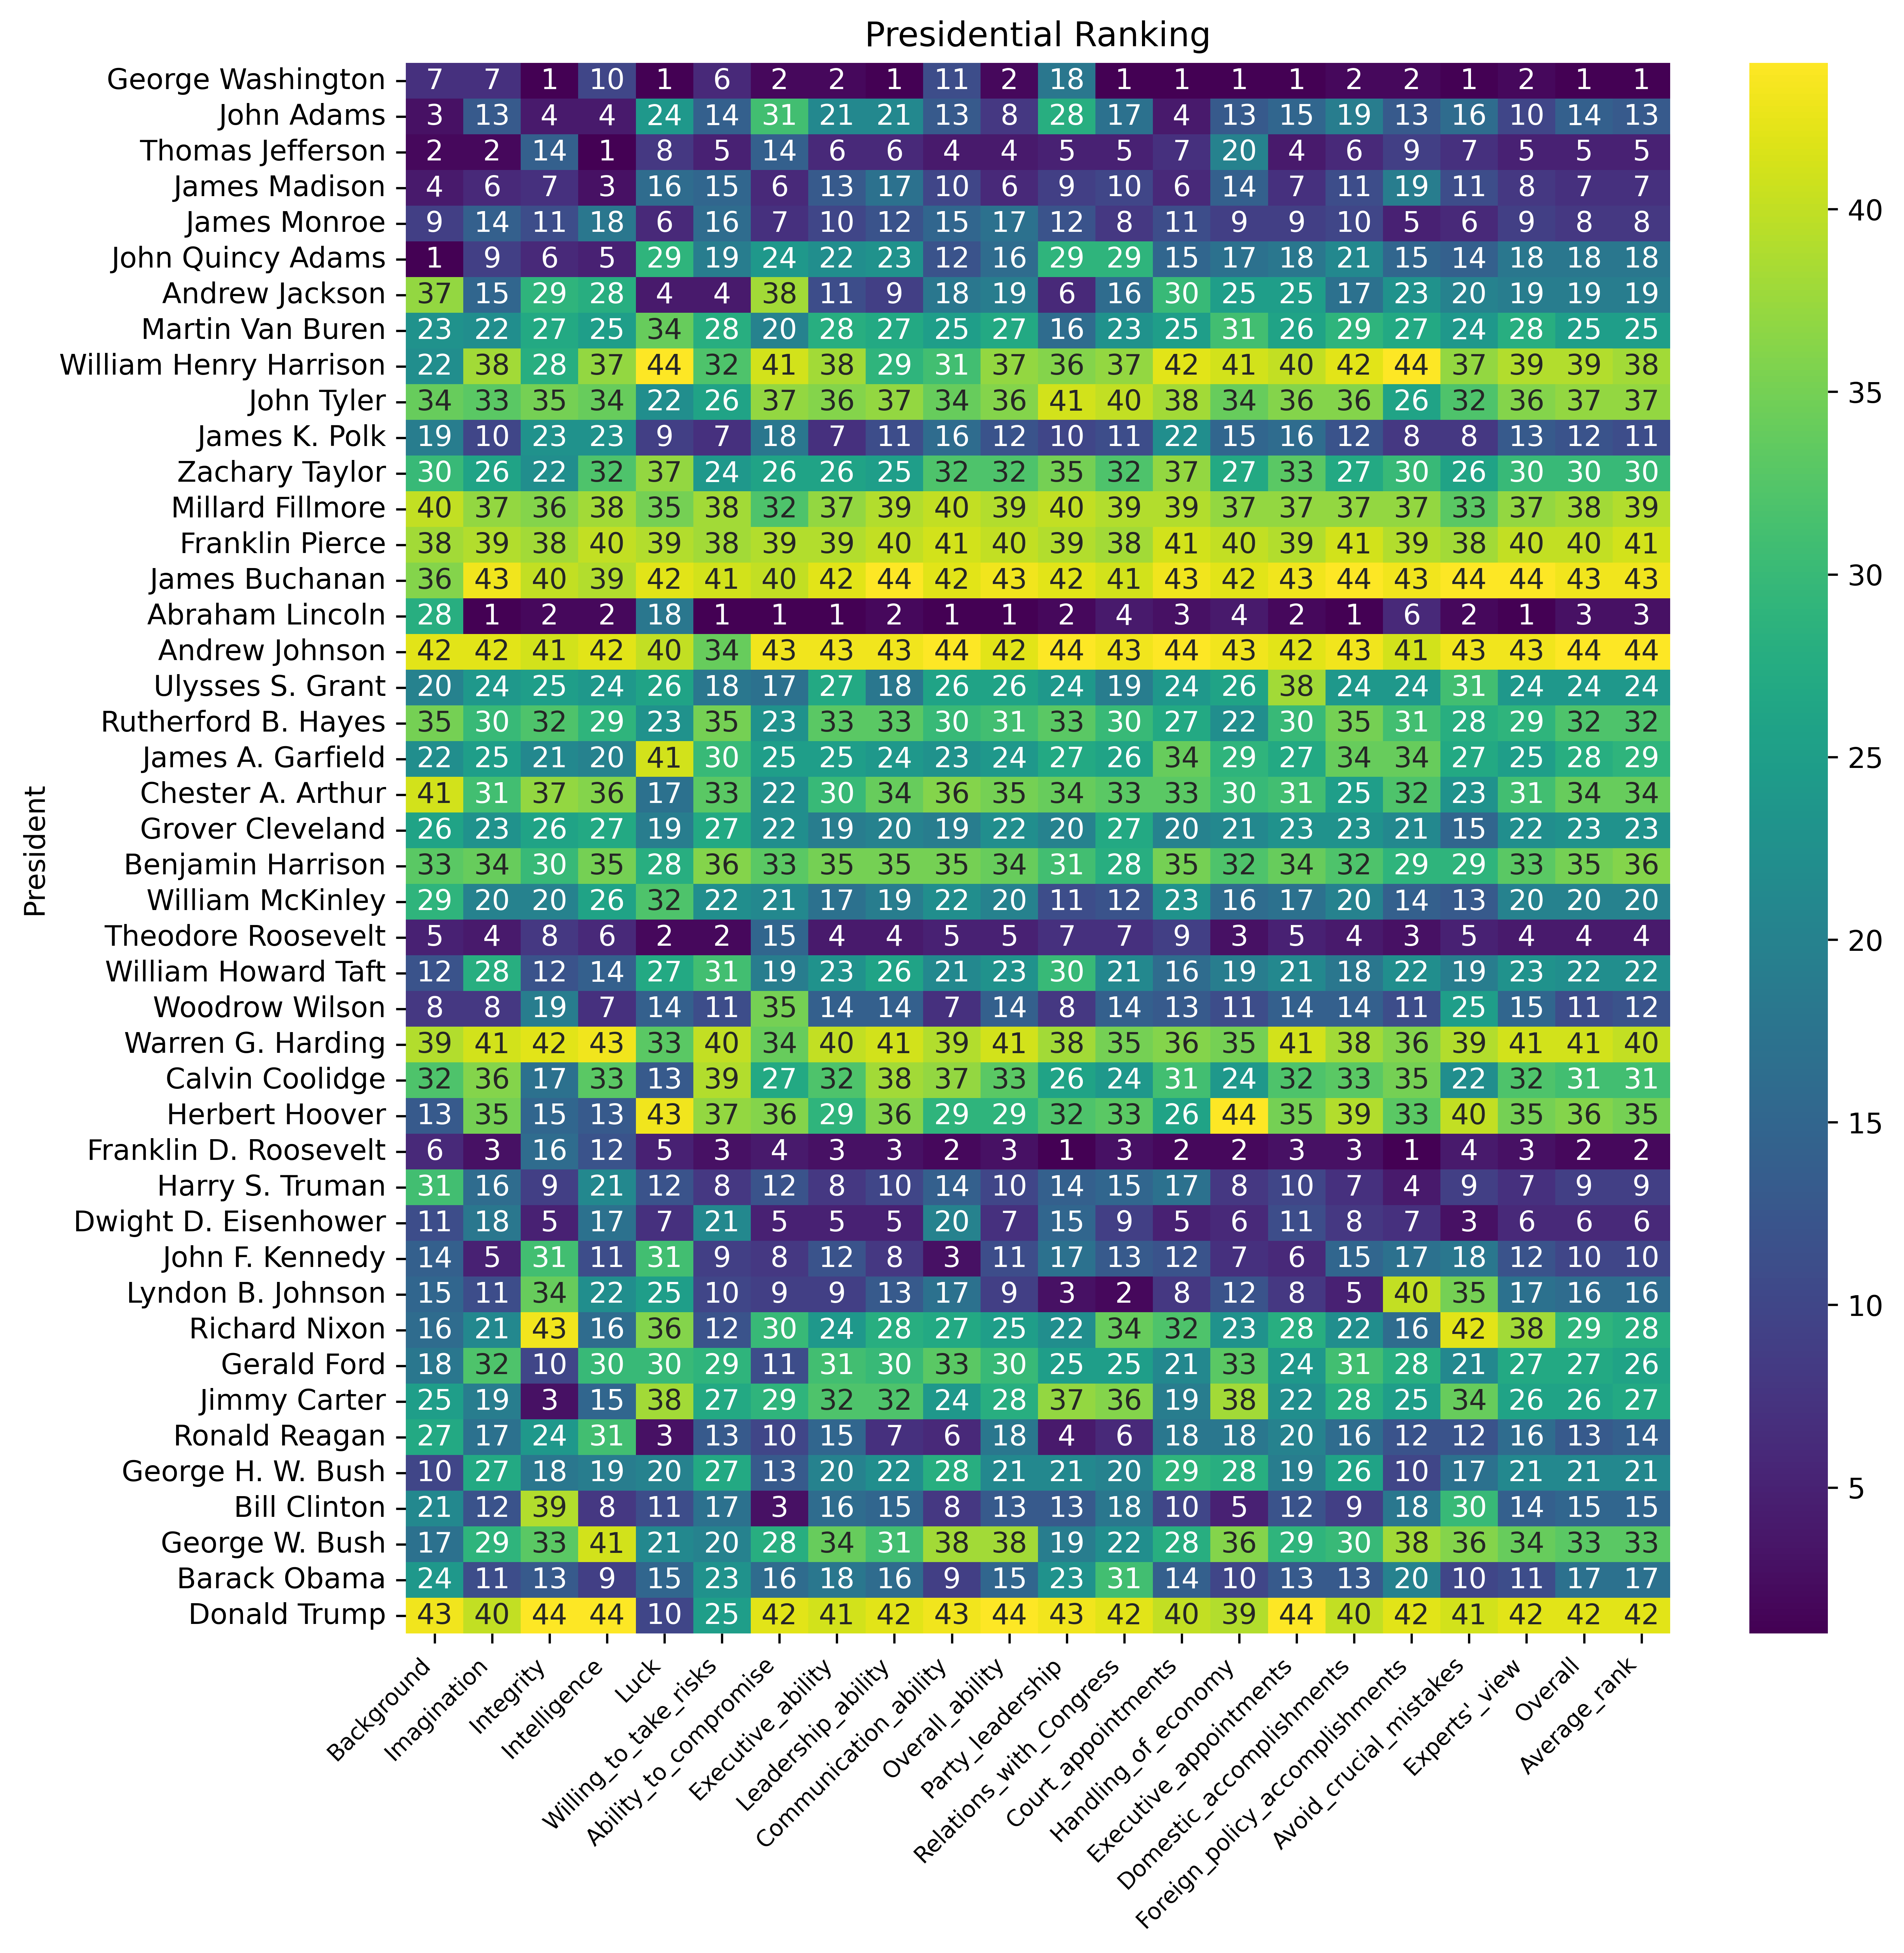

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10), dpi=600)
g = sns.heatmap((tweak_siena_pres(df)     # doctest: +SKIP
   .set_index('President')
   .iloc[:,2:-1]
  ),annot=True, cmap='viridis', ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=45, fontsize=8,
    ha='right')    # doctest: +SKIP
_ = plt.title('Presidential Ranking')
#fig.savefig('img/pandas2/20-pres.png', bbox_inches='tight')       # doctest: +SKIP

In [6]:
pres = tweak_siena_pres(df)
pres.head(3)

Seq          President                  Party  Background  Imagination  \
1   1  George Washington            Independent           7            7   
2   2         John Adams             Federalist           3           13   
3   3   Thomas Jefferson  Democratic-Republican           2            2   

   Integrity  Intelligence  Luck  Willing_to_take_risks  \
1          1            10     1                      6   
2          4             4    24                     14   
3         14             1     8                      5   

   Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
1                      2  ...                   1                    1   
2                     31  ...                   4                   13   
3                     14  ...                   7                   20   

   Executive_appointments  Domestic_accomplishments  \
1                       1                         2   
2                      15                        19   
3                       4                         6   

   Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
1                               2                       1              2   
2                              13                      16             10   
3                               9                       7              5   

   Overall  Average_rank  Quartile  
1        1             1       1st  
2       14            13       2nd  
3        5             5       1st  

[3 rows x 26 columns]

In [7]:
pres.sample(3)

Seq            President                  Party  Background  Imagination  \
4    4        James Madison  Democratic-Republican           4            6   
32  33      Harry S. Truman             Democratic          31           16   
26  27  William Howard Taft             Republican          12           28   

    Integrity  Intelligence  Luck  Willing_to_take_risks  \
4           7             3    16                     15   
32          9            21    12                      8   
26         12            14    27                     31   

    Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
4                       6  ...                   6                   14   
32                     12  ...                  17                    8   
26                     19  ...                  16                   19   

    Executive_appointments  Domestic_accomplishments  \
4                        7                        11   
32                      10                         7   
26                      21                        18   

    Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
4                               19                      11              8   
32                               4                       9              7   
26                              22                      19             23   

    Overall  Average_rank  Quartile  
4         7             7       1st  
32        9             9       1st  
26       22            22       2nd  

[3 rows x 26 columns]

In [8]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)

In [9]:
pres = tweak_siena_pres(df)

In [10]:
scores = (pres
 .loc[:,'Background':'Average_rank']
)
scores

Background  Imagination  Integrity  Intelligence  Luck  \
1            7            7          1            10     1   
2            3           13          4             4    24   
3            2            2         14             1     8   
4            4            6          7             3    16   
5            9           14         11            18     6   
..         ...          ...        ...           ...   ...   
40          10           27         18            19    20   
41          21           12         39             8    11   
42          17           29         33            41    21   
43          24           11         13             9    15   
44          43           40         44            44    10   

    Willing_to_take_risks  Ability_to_compromise  Executive_ability  \
1                       6                      2                  2   
2                      14                     31                 21   
3                       5                     14                  6   
4                      15                      6                 13   
5                      16                      7                 10   
..                    ...                    ...                ...   
40                     27                     13                 20   
41                     17                      3                 16   
42                     20                     28                 34   
43                     23                     16                 18   
44                     25                     42                 41   

    Leadership_ability  Communication_ability  ...  Relations_with_Congress  \
1                    1                     11  ...                        1   
2                   21                     13  ...                       17   
3                    6                      4  ...                        5   
4                   17                     10  ...                       10   
5                   12                     15  ...                        8   
..                 ...                    ...  ...                      ...   
40                  22                     28  ...                       20   
41                  15                      8  ...                       18   
42                  31                     38  ...                       22   
43                  16                      9  ...                       31   
44                  42                     43  ...                       42   

    Court_appointments  Handling_of_economy  Executive_appointments  \
1                    1                    1                       1   
2                    4                   13                      15   
3                    7                   20                       4   
4                    6                   14                       7   
5                   11                    9                       9   
..                 ...                  ...                     ...   
40                  29                   28                      19   
41                  10                    5                      12   
42                  28                   36                      29   
43                  14                   10                      13   
44                  40                   39                      44   

    Domestic_accomplishments  Foreign_policy_accomplishments  \
1                          2                               2   
2                         19                              13   
3                          6                               9   
4                         11                              19   
5                         10                               5   
..                       ...                             ...   
40                        26                              10   
41                         9                              18   
42                        30

In [11]:
s1 = scores.iloc[:3, :4]
s1

Background  Imagination  Integrity  Intelligence
1           7            7          1            10
2           3           13          4             4
3           2            2         14             1

In [12]:
s2 = scores.iloc[1:6, :5]
s2

Background  Imagination  Integrity  Intelligence  Luck
2           3           13          4             4    24
3           2            2         14             1     8
4           4            6          7             3    16
5           9           14         11            18     6
6           1            9          6             5    29

In [13]:
s1 + s2

Background  Imagination  Integrity  Intelligence  Luck
1         NaN          NaN        NaN           NaN   NaN
2         6.0         26.0        8.0           8.0   NaN
3         4.0          4.0       28.0           2.0   NaN
4         NaN          NaN        NaN           NaN   NaN
5         NaN          NaN        NaN           NaN   NaN
6         NaN          NaN        NaN           NaN   NaN

In [14]:
scores.iloc[:3, :4] + pd.concat([scores.iloc[1:6, :5]]*2)

Background  Imagination  Integrity  Intelligence  Luck
1          NaN          NaN        NaN           NaN   NaN
2          6.0         26.0        8.0           8.0   NaN
2          6.0         26.0        8.0           8.0   NaN
3          4.0          4.0       28.0           2.0   NaN
3          4.0          4.0       28.0           2.0   NaN
..         ...          ...        ...           ...   ...
4          NaN          NaN        NaN           NaN   NaN
5          NaN          NaN        NaN           NaN   NaN
5          NaN          NaN        NaN           NaN   NaN
6          NaN          NaN        NaN           NaN   NaN
6          NaN          NaN        NaN           NaN   NaN

[11 rows x 5 columns]

In [15]:
pd.concat([scores.iloc[1:6, :5]]*2).index.duplicated().any()

True

In [16]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)
pres = tweak_siena_pres(df)

In [17]:
# iteration over columns (col_name, series) tuple
for col_name, col in pres.iteritems():
    print(col_name, type(col))
    break

Seq <class 'pandas.core.series.Series'>


In [18]:
# iteration over rows (index, row(as a series)) tuple
for idx, row in pres.iterrows():
    print(idx, type(row))
    break

1 <class 'pandas.core.series.Series'>


In [19]:
# iteration over rows as namedtuple (index as first item)
for tup in pres.itertuples():
    print(tup[0], tup.Party)
    break

1 Independent


In [20]:
scores = (pres
 .loc[:,'Background':'Average_rank']
)
scores.sum(axis='columns') / len(scores.columns)

1      3.681818
2     14.454545
3      6.545455
4      9.636364
5     10.454545
        ...    
40    20.818182
41    14.636364
42    30.363636
43    15.818182
44    39.772727
Length: 44, dtype: float64

In [21]:
pres.agg(['count', 'size', 'sum', lambda col: col.loc[1]])

/tmp/ipykernel_23592/3689339385.py:1: FutureWarning: ['Party', 'Quartile'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  pres.agg(['count', 'size', 'sum', lambda col: col.loc[1]])


Seq  \
count                                                    44   
size                                                     44   
sum       12345678910111213141516171819202122/2423252627...   
<lambda>                                                  1   

                                                  President        Party  \
count                                                    44           44   
size                                                     44           44   
sum       George WashingtonJohn AdamsThomas JeffersonJam...          NaN   
<lambda>                                  George Washington  Independent   

          Background  Imagination  Integrity  Intelligence  Luck  \
count             44           44         44            44    44   
size              44           44         44            44    44   
sum              968          957        990           990   990   
<lambda>           7            7          1            10     1   

          Willing_to_take_risks  Ability_to_compromise  ...  \
count                        44                     44  ...   
size                         44                     44  ...   
sum                         953                    968  ...   
<lambda>                      6                      2  ...   

          Court_appointments  Handling_of_economy  Executive_appointments  \
count                     44                   44                      44   
size                      44                   44                      44   
sum                      990                  990                     990   
<lambda>                   1                    1                       1   

          Domestic_accomplishments  Foreign_policy_accomplishments  \
count                           44                              44   
size                            44                              44   
sum                            990                             990   
<lambda>                         2                               2   

          Avoid_crucial_mistakes  Experts'_view  Overall  Average_rank  \
count                         44             44       44            44   
size                          44             44       44            44   
sum                          990            990      990           990   
<lambda>                       1              2        1             1   

          Quartile  
count           44  
size            44  
sum            NaN  
<lambda>       1st  

[4 rows x 26 columns]

In [22]:
pres.agg({'Luck': ['count', 'size'], 'Overall': ['count', 'max']})

Luck  Overall
count  44.0     44.0
size   44.0      NaN
max     NaN     44.0

In [23]:
pres.agg(Intelligence_count=('Intelligence', 'count'),
         Intelligence_size=('Intelligence', 'size')
         )

Intelligence
Intelligence_count            44
Intelligence_size             44

In [24]:
pres.describe()

Background  Imagination  Integrity  Intelligence       Luck  \
count   44.000000    44.000000  44.000000     44.000000  44.000000   
mean    22.000000    21.750000  22.500000     22.500000  22.500000   
std     12.409674    12.519984  12.845233     12.845233  12.845233   
min      1.000000     1.000000   1.000000      1.000000   1.000000   
25%     11.750000    11.000000  11.750000     11.750000  11.750000   
50%     22.000000    21.500000  22.500000     22.500000  22.500000   
75%     32.250000    32.250000  33.250000     33.250000  33.250000   
max     43.000000    43.000000  44.000000     44.000000  44.000000   

       Willing_to_take_risks  Ability_to_compromise  Executive_ability  \
count              44.000000              44.000000          44.000000   
mean               21.659091              22.000000          22.227273   
std                11.892822              12.409674          12.500909   
min                 1.000000               1.000000           1.000000   
25%                11.750000              11.750000          11.750000   
50%                22.500000              22.000000          22.500000   
75%                31.250000              32.250000          32.250000   
max                41.000000              43.000000          43.000000   

       Leadership_ability  Communication_ability  ...  \
count           44.000000              44.000000  ...   
mean            22.500000              22.500000  ...   
std             12.845233              12.845233  ...   
min              1.000000               1.000000  ...   
25%             11.750000              11.750000  ...   
50%             22.500000              22.500000  ...   
75%             33.250000              33.250000  ...   
max             44.000000              44.000000  ...   

       Relations_with_Congress  Court_appointments  Handling_of_economy  \
count                44.000000           44.000000            44.000000   
mean                 22.250000           22.500000            22.500000   
std                  12.519984           12.845233            12.845233   
min                   1.000000            1.000000             1.000000   
25%                  11.750000           11.750000            11.750000   
50%                  22.500000           22.500000            22.500000   
75%                  33.000000           33.250000            33.250000   
max                  43.000000           44.000000            44.000000   

       Executive_appointments  Domestic_accomplishments  \
count               44.000000                 44.000000   
mean                22.500000                 22.500000   
std                 12.845233                 12.845233   
min                  1.000000                  1.000000   
25%                 11.750000                 11.750000   
50%                 22.500000                 22.500000   
75%                 33.250000                 33.250000   
max                 44.000000                 44.000000   

       Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
count                       44.000000               44.000000      44.000000   
mean                        22.500000               22.500000      22.500000   
std                         12.845233               12.845233      12.845233   
min                          1.000000                1.000000       1.000000   
25%                         11.750000               11.750000      11.750000   
50%                         22.500000               22.500000      22.500000   
75%                         33.250000               33.250000      33.250000   
max                         44.000000               44.000000      44.000000   

         Overall  Average_rank  
count  44.000000     44.000000  
mean   22.500000     22.500000  
std    12.845233     12.845233  
min     1.000000      1.000000  
25%    11.750000     11.750000  
50%    22.500000     22.500000  
75%    33.250000     33.250000  
ma

In [25]:
(pres
    .select_dtypes('number')
    .pipe(lambda df_:df_.max(axis='columns') 
          - df_.min(axis='columns'))
)

1     17
2     28
3     19
4     16
5     13
      ..
40    19
41    36
42    24
43    22
44    34
Length: 44, dtype: uint8

In [26]:
(pres
 .select_dtypes('number')
 .apply(lambda row: row.max()-row.min(), axis='columns')
)

1     17
2     28
3     19
4     16
5     13
      ..
40    19
41    36
42    24
43    22
44    34
Length: 44, dtype: int8

In [27]:
pres.select_dtypes('number').apply('sum')  # axis=0

Background                        968
Imagination                       957
Integrity                         990
Intelligence                      990
Luck                              990
                                 ... 
Foreign_policy_accomplishments    990
Avoid_crucial_mistakes            990
Experts'_view                     990
Overall                           990
Average_rank                      990
Length: 22, dtype: int64

In [28]:
pres.select_dtypes('number').sum()  # axis=0

Background                        968
Imagination                       957
Integrity                         990
Intelligence                      990
Luck                              990
                                 ... 
Foreign_policy_accomplishments    990
Avoid_crucial_mistakes            990
Experts'_view                     990
Overall                           990
Average_rank                      990
Length: 22, dtype: int64

In [29]:
import io
billing_data = \
'''cancel_date,period_start,start_date,end_date,rev,sum_payments
12/1/2019,1/1/2020,12/15/2019,5/15/2020,999,50
,1/1/2020,12/15/2019,5/15/2020,999,50
,1/1/2020,12/15/2019,5/15/2020,999,1950
1/20/2020,1/1/2020,12/15/2019,5/15/2020,499,0
,1/1/2020,12/24/2019,5/24/2020,699,100
,1/1/2020,11/29/2019,4/29/2020,799,250
,1/1/2020,1/15/2020,4/29/2020,799,250'''

In [30]:
bill_df = pd.read_csv(io.StringIO(billing_data),
    parse_dates=['cancel_date', 'period_start', 'start_date',
                 'end_date'])

In [31]:
bill_df

cancel_date period_start start_date   end_date  rev  sum_payments
0  2019-12-01   2020-01-01 2019-12-15 2020-05-15  999            50
1         NaT   2020-01-01 2019-12-15 2020-05-15  999            50
2         NaT   2020-01-01 2019-12-15 2020-05-15  999          1950
3  2020-01-20   2020-01-01 2019-12-15 2020-05-15  499             0
4         NaT   2020-01-01 2019-12-24 2020-05-24  699           100
5         NaT   2020-01-01 2019-11-29 2020-04-29  799           250
6         NaT   2020-01-01 2020-01-15 2020-04-29  799           250

In [32]:
def calc_unbilled_rec(vals):
    cancel_date, period_start, start_date, end_date, rev, \
         sum_payments = vals
    if cancel_date < period_start:
        return
    if start_date < period_start and end_date > period_start:
        if rev > sum_payments:
            return rev - sum_payments
        else:
            return 0

In [33]:
bill_df.apply(calc_unbilled_rec, axis='columns')

0      NaN
1    949.0
2      0.0
3    499.0
4    599.0
5    549.0
6      NaN
dtype: float64

In [34]:
import numpy as np
pd.Series(np.select([
       (bill_df.cancel_date < bill_df.period_start),   # 1
       ((bill_df.start_date < bill_df.period_start) &  # 2
        (bill_df.end_date > bill_df.period_start) &
        (bill_df.rev > bill_df.sum_payments)),
       ((bill_df.start_date < bill_df.period_start) &  # 3
        (bill_df.end_date > bill_df.period_start) &
        (bill_df.rev <= bill_df.sum_payments))
      ],
      [np.nan, bill_df.rev - bill_df.sum_payments, 0],  # 1, 2, 3
      np.nan))  # default

0      NaN
1    949.0
2      0.0
3    499.0
4    599.0
5    549.0
6      NaN
dtype: float64

In [35]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)
pres = tweak_siena_pres(df)

In [36]:
df.memory_usage(deep=True)

Index         352
Seq.         2590
President    3175
Party        2976
Bg            352
             ... 
DA            352
FPA           352
AM            352
EV            352
O             352
Length: 25, dtype: int64

In [37]:
pres.memory_usage(deep=True)

Index                      352
Seq                       2590
President                 3175
Party                      624
Background                  44
                          ... 
Avoid_crucial_mistakes      44
Experts'_view               44
Overall                     44
Average_rank                44
Quartile                   456
Length: 27, dtype: int64

In [38]:
pres.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 1 to 44
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Seq                             44 non-null     object  
 1   President                       44 non-null     object  
 2   Party                           44 non-null     category
 3   Background                      44 non-null     uint8   
 4   Imagination                     44 non-null     uint8   
 5   Integrity                       44 non-null     uint8   
 6   Intelligence                    44 non-null     uint8   
 7   Luck                            44 non-null     uint8   
 8   Willing_to_take_risks           44 non-null     uint8   
 9   Ability_to_compromise           44 non-null     uint8   
 10  Executive_ability               44 non-null     uint8   
 11  Leadership_ability              44 non-null     uint8   
 12  Communication_ability   

In [39]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      '2020-jetbrains-python-survey.csv'
jb = pd.read_csv(url)
jb    

/tmp/ipykernel_23592/447577319.py:4: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  jb = pd.read_csv(url)


is.python.main other.lang.None other.lang.Java other.lang.JavaScript  \
0                Yes             NaN             NaN                   NaN   
1                Yes             NaN            Java            JavaScript   
2                Yes             NaN             NaN                   NaN   
3                Yes             NaN             NaN            JavaScript   
4                Yes             NaN            Java            JavaScript   
...              ...             ...             ...                   ...   
54457            Yes             NaN             NaN                   NaN   
54458            Yes             NaN             NaN            JavaScript   
54459            Yes             NaN             NaN            JavaScript   
54460            Yes             NaN             NaN            JavaScript   
54461            Yes             NaN             NaN            JavaScript   

      other.lang.C/C++ other.lang.PHP other.lang.C# other.lang.Ruby  \
0                  NaN            NaN           NaN             NaN   
1                  NaN            NaN            C#             NaN   
2                C/C++            NaN           NaN             NaN   
3                  NaN            NaN           NaN             NaN   
4                C/C++            NaN           NaN             NaN   
...                ...            ...           ...             ...   
54457            C/C++            NaN           NaN             NaN   
54458              NaN            NaN           NaN             NaN   
54459              NaN            PHP           NaN             NaN   
54460            C/C++            PHP           NaN             NaN   
54461              NaN            NaN           NaN             NaN   

      other.lang.Bash / Shell other.lang.Objective-C  ...  \
0                Bash / Shell                    NaN  ...   
1                         NaN                    NaN  ...   
2                Bash / Shell                    NaN  ...   
3                Bash / Shell                    NaN  ...   
4                Bash / Shell                    NaN  ...   
...                       ...                    ...  ...   
54457            Bash / Shell            Objective-C  ...   
54458            Bash / Shell                    NaN  ...   
54459            Bash / Shell                    NaN  ...   
54460            Bash / Shell                    NaN  ...   
54461                     NaN                    NaN  ...   

      job.role.Technical support job.role.Data analyst  \
0                            NaN                   NaN   
1                            NaN                   NaN   
2              Technical support          Data analyst   
3                            NaN                   NaN   
4                            NaN                   NaN   
...                          ...                   ...   
54457                        NaN                   NaN   
54458                        NaN                   NaN   
54459                        NaN                   NaN   
54460                        NaN          Data analyst   
54461                        NaN                   NaN   

      job.role.Business analyst job.role.Team lead job.role.Product manager  \
0              Business analyst                NaN                      NaN   
1                           NaN                NaN                      NaN   
2                           NaN          Team lead                      NaN   
3                           NaN                NaN                      NaN   
4                           NaN                NaN                      NaN   
...                         ...                ...                      ...   
54457                       NaN                NaN                      NaN   
54458                       NaN                NaN                      NaN   
54459                       NaN                NaN                      NaN

In [40]:
import collections
counter = collections.defaultdict(list)
for col in sorted(jb.columns):
    period_count = col.count('.')
    if period_count >= 2:
        part_end = 2
    else:
        part_end = 1
    parts = col.split('.')[:part_end]
    counter['.'.join(parts)].append(col)
uniq_cols = []
for cols in counter.values():
    if len(cols) == 1:
        uniq_cols.extend(cols)

In [41]:
uniq_cols

['age',
 'are.you.datascientist',
 'company.size',
 'country.live',
 'employment.status',
 'first.learn.about.main.ide',
 'how.often.use.main.ide',
 'ide.main',
 'is.python.main',
 'job.team',
 'main.purposes',
 'missing.features.main.ide',
 'nps.main.ide',
 'python.years',
 'python2.version.most',
 'python3.version.most',
 'several.projects',
 'team.size',
 'use.python.most',
 'years.of.coding']

In [42]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .age
 .value_counts(dropna=False)
)

NaN            29701
21–29           9710
30–39           7512
40–49           3010
18–20           2567
50–59           1374
60 or older      588
Name: age, dtype: int64

In [43]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .age
 .str.slice(0,2)
 .astype(float)
)

0        30.0
1        21.0
2        30.0
3         NaN
4        21.0
         ... 
54457    21.0
54458     NaN
54459    21.0
54460    30.0
54461    21.0
Name: age, Length: 54462, dtype: float64

In [44]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .age
 .str.slice(0,2)
 .astype('Int64')
)

0          30
1          21
2          30
3        <NA>
4          21
         ... 
54457      21
54458    <NA>
54459      21
54460      30
54461      21
Name: age, Length: 54462, dtype: Int64

In [45]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .age
 .str.slice(0,2)
 .astype(float)
 .astype('Int64')
)

0          30
1          21
2          30
3        <NA>
4          21
         ... 
54457      21
54458    <NA>
54459      21
54460      30
54461      21
Name: age, Length: 54462, dtype: Int64

In [46]:
jb2 = jb[uniq_cols]
age_slice = jb.age.str.slice(0, 2)
age_float = age_slice.astype(float)
age_int = age_float.astype('Int64')
jb2['age'] = age_int

/tmp/ipykernel_23592/3827098045.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb2['age'] = age_int


In [47]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .assign(age=lambda df_:df_.age
    .str.slice(0,2)
    .astype(float)
    .astype('Int64'))
)

age are_you_datascientist     company_size        country_live  \
0        30                   NaN          Just me                 NaN   
1        21                   Yes  More than 5,000               India   
2        30                    No  More than 5,000       United States   
3      <NA>                   NaN              NaN                 NaN   
4        21                   NaN              NaN               Italy   
...     ...                   ...              ...                 ...   
54457    21                    No             2–10  Russian Federation   
54458  <NA>                    No              NaN                 NaN   
54459    21                   NaN          Just me  Russian Federation   
54460    30                   Yes           51–500               Spain   
54461    21                   NaN            11–50             Algeria   

                                       employment_status  \
0         Partially employed by a company / organization   
1             Fully employed by a company / organization   
2             Fully employed by a company / organization   
3                                                    NaN   
4                                                Student   
...                                                  ...   
54457         Fully employed by a company / organization   
54458                                                NaN   
54459  Self-employed (a person earning income directl...   
54460         Fully employed by a company / organization   
54461         Fully employed by a company / organization   

                      first_learn_about_main_ide how_often_use_main_ide  \
0                        Conference / User Group                 Weekly   
1                            School / University                  Daily   
2                             Friend / Colleague                  Daily   
3                             Friend / Colleague                  Daily   
4                                 Search engines                  Daily   
...                                          ...                    ...   
54457                        School / University                  Daily   
54458                                        NaN                    NaN   
54459                         Friend / Colleague                  Daily   
54460                             Search engines                  Daily   
54461   Online learning platform / Online course                  Daily   

                           ide_main is_python_main  \
0         PyCharm Community Edition            Yes   
1                           VS Code            Yes   
2                               Vim            Yes   
3      PyCharm Professional Edition            Yes   
4                           VS Code            Yes   
...                             ...            ...   
54457                           Vim            Yes   
54458                           NaN            Yes   
54459  PyCharm Professional Edition            Yes   
54460                         Other            Yes   
54461                       VS Code            Yes   

                                        job_team  \
0      Work as an external consultant or trainer   
1                                 Work in a team   
2      Work on your own project(s) independently   
3                                            NaN   
4      Work on your own project(s) independently   
...                                          ...   
54457  Work on your own project(s) independently   
54458                                        NaN   
54459                             Work in a team   
54460  Work on your own project(s) independently   
54461                             Work in a team   

                                     main_purposes  \
0                                         For work   
1                       Both for work and personal   
2                       Both for work and personal   
3      

In [48]:
import numpy as np
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .assign(age=lambda df_:df_.age.str.slice(0,2)
                           .astype(float).astype('Int64'),
         are_you_datascientist=lambda df_: df_.are_you_datascientist
            .replace({'Yes': True, 'No': False, np.nan: False})
        )
 .are_you_datascientist
)

0        False
1         True
2        False
3        False
4        False
         ...  
54457    False
54458    False
54459    False
54460     True
54461    False
Name: are_you_datascientist, Length: 54462, dtype: object

In [49]:
(jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .assign(age=lambda df_:df_.age.str.slice(0,2)
                           .astype(float).astype('Int64'),
        are_you_datascientist=lambda df_: df_.are_you_datascientist
            .replace({'Yes': True, 'No': False, np.nan: False})
        )
 .company_size
 .value_counts(dropna=False)
)

NaN                35037
51–500              4608
More than 5,000     3635
11–50               3507
2–10                2558
1,001–5,000         1934
Just me             1492
501–1,000           1165
Not sure             526
Name: company_size, dtype: int64

In [50]:
jb2 = (jb
 [uniq_cols]
 .rename(columns=lambda c: c.replace('.', '_'))
 .assign(age=lambda df_:df_.age.str.slice(0,2).astype(float)
             .astype('Int64'),
         are_you_datascientist=lambda df_:df_.are_you_datascientist
             .replace({'Yes': True, 'No': False, np.nan: False}),
         company_size=lambda df_:df_.company_size.replace({
             'Just me': 1, 'Not sure': np.nan, 
             'More than 5,000': 5000, '2–10': 2, '11–50':11,
             '51–500': 51, '501–1,000':501,
             '1,001–5,000':1001}).astype('Int64'),
         country_live=lambda df_:df_.country_live.astype('category'),
         employment_status=lambda df_:df_.employment_status
              .fillna('Other').astype('category'),
         is_python_main=lambda df_:df_.is_python_main
              .astype('category'),
         team_size=lambda df_:df_.team_size
             .str.split(r'-', n=1, expand=True)
             .iloc[:,0].replace('More than 40 people', 41)
             .where(df_.company_size!=1, 1).astype(float),
         years_of_coding=lambda df_:df_.years_of_coding
             .replace('Less than 1 year', .5).str.extract(r'(\d+)')
             .astype(float),
         python_years=lambda df_:df_.python_years
             .replace('Less than 1 year', .5).str.extract(r'(\d+)')
             .astype(float),
         python3_ver=lambda df_:df_.python3_version_most
              .str.replace('_', '.').str.extract(r'(\d\.\d)')
              .astype(float),
         use_python_most=lambda df_:df_.use_python_most
              .fillna('Unknown')
        )
    .drop(columns=['python2_version_most'])
)

In [51]:
jb2

age are_you_datascientist  company_size        country_live  \
0        30                 False             1                 NaN   
1        21                  True          5000               India   
2        30                 False          5000       United States   
3      <NA>                 False          <NA>                 NaN   
4        21                 False          <NA>               Italy   
...     ...                   ...           ...                 ...   
54457    21                 False             2  Russian Federation   
54458  <NA>                 False          <NA>                 NaN   
54459    21                 False             1  Russian Federation   
54460    30                  True            51               Spain   
54461    21                 False            11             Algeria   

                                       employment_status  \
0         Partially employed by a company / organization   
1             Fully employed by a company / organization   
2             Fully employed by a company / organization   
3                                                  Other   
4                                                Student   
...                                                  ...   
54457         Fully employed by a company / organization   
54458                                              Other   
54459  Self-employed (a person earning income directl...   
54460         Fully employed by a company / organization   
54461         Fully employed by a company / organization   

                      first_learn_about_main_ide how_often_use_main_ide  \
0                        Conference / User Group                 Weekly   
1                            School / University                  Daily   
2                             Friend / Colleague                  Daily   
3                             Friend / Colleague                  Daily   
4                                 Search engines                  Daily   
...                                          ...                    ...   
54457                        School / University                  Daily   
54458                                        NaN                    NaN   
54459                         Friend / Colleague                  Daily   
54460                             Search engines                  Daily   
54461   Online learning platform / Online course                  Daily   

                           ide_main is_python_main  \
0         PyCharm Community Edition            Yes   
1                           VS Code            Yes   
2                               Vim            Yes   
3      PyCharm Professional Edition            Yes   
4                           VS Code            Yes   
...                             ...            ...   
54457                           Vim            Yes   
54458                           NaN            Yes   
54459  PyCharm Professional Edition            Yes   
54460                         Other            Yes   
54461                       VS Code            Yes   

                                        job_team  \
0      Work as an external consultant or trainer   
1                                 Work in a team   
2      Work on your own project(s) independently   
3                                            NaN   
4      Work on your own project(s) independently   
...                                          ...   
54457  Work on your own project(s) independently   
54458                                        NaN   
54459                             Work in a team   
54460  Work on your own project(s) independently   
54461                             Work in a team   

                                     main_purposes  \
0                                         For work   
1                       Both for work and personal   
2                       Both for work and personal   
3                       Both for work and p

In [52]:
(jb2
 .query('team_size.isna()')
 .employment_status
 .value_counts(dropna=False)
)

Fully employed by a company / organization                                                        5279
Working student                                                                                    696
Partially employed by a company / organization                                                     482
Self-employed (a person earning income directly from one's own business, trade, or profession)     430
Freelancer (a person pursuing a profession without a long-term commitment to any one employer)       0
Other                                                                                                0
Retired                                                                                              0
Student                                                                                              0
Name: employment_status, dtype: int64

In [53]:
import catboost as cb
import numpy as np

In [54]:
def prep_for_ml(df):
    # remove pandas types
    return (df
     .assign(**{col:df[col].astype(float) 
               for col in df.select_dtypes('number')},
             **{col:df[col].astype(str).fillna('') 
               for col in df.select_dtypes(['object', 'category'])})
    )

In [55]:
def predict_col(df, col):
    df = prep_for_ml(df)
    missing = df.query(f'~{col}.isna()')
    cat_idx = [i for i,typ in enumerate(df.drop(columns=[col]).dtypes)
               if str(typ) == 'object']
    X = (missing
         .drop(columns=[col])
         .values
        )
    y = missing[col]
    model = cb.CatBoostRegressor(iterations=20, cat_features=cat_idx)
    model.fit(X,y, cat_features=cat_idx)
    pred = model.predict(df.drop(columns=[col]))
    return df[col].where(~df[col].isna(), pred)

In [56]:
jb2 = (jb
  [uniq_cols]
  .rename(columns=lambda c: c.replace('.', '_'))
  .assign(age=lambda df_:df_.age.str.slice(0,2).astype(float)
             .astype('Int64'),
         are_you_datascientist=lambda df_:df_.are_you_datascientist
             .replace({'Yes': True, 'No': False, np.nan: False}),
         company_size=lambda df_:df_.company_size.replace({
             'Just me': 1, 'Not sure': np.nan, 
             'More than 5,000': 5000, '2–10': 2, '11–50':11,
             '51–500': 51, '501–1,000':501,
             '1,001–5,000':1001}).astype('Int64'),
         country_live=lambda df_:df_.country_live.astype('category'),
         employment_status=lambda df_:df_.employment_status
              .fillna('Other').astype('category'),
         is_python_main=lambda df_:df_.is_python_main
              .astype('category'),
         team_size=lambda df_:df_.team_size
             .str.split(r'-', n=1, expand=True)
             .iloc[:,0].replace('More than 40 people', 41)
             .where(df_.company_size!=1, 1).astype(float),
         years_of_coding=lambda df_:df_.years_of_coding
             .replace('Less than 1 year', .5).str.extract(r'(\d+)')
             .astype(float),
         python_years=lambda df_:df_.python_years
             .replace('Less than 1 year', .5).str.extract(r'(\d+)')
             .astype(float),
         python3_ver=lambda df_:df_.python3_version_most
              .str.replace('_', '.').str.extract(r'(\d\.\d)')
              .astype(float),
         use_python_most=lambda df_:df_.use_python_most
              .fillna('Unknown')
        )
  .assign(team_size=lambda df_:predict_col(df_, 'team_size')
          .astype(int))
  .drop(columns=['python2_version_most'])
  .dropna()
)
jb2

Learning rate set to 0.5
0:	learn: 2.9695218	total: 59.4ms	remaining: 1.13s
1:	learn: 2.8766539	total: 68ms	remaining: 612ms
2:	learn: 2.8387189	total: 75.2ms	remaining: 426ms
3:	learn: 2.8028751	total: 81ms	remaining: 324ms
4:	learn: 2.7899957	total: 86.4ms	remaining: 259ms
5:	learn: 2.7749439	total: 92.4ms	remaining: 216ms
6:	learn: 2.7719128	total: 97.6ms	remaining: 181ms
7:	learn: 2.7649792	total: 103ms	remaining: 155ms
8:	learn: 2.7649588	total: 108ms	remaining: 132ms
9:	learn: 2.7630617	total: 113ms	remaining: 113ms
10:	learn: 2.7625779	total: 119ms	remaining: 97.4ms
11:	learn: 2.7515902	total: 125ms	remaining: 83.3ms
12:	learn: 2.7513459	total: 130ms	remaining: 70ms
13:	learn: 2.7445634	total: 135ms	remaining: 57.8ms
14:	learn: 2.7443257	total: 140ms	remaining: 46.6ms
15:	learn: 2.7423142	total: 145ms	remaining: 36.2ms
16:	learn: 2.7419143	total: 150ms	remaining: 26.4ms
17:	learn: 2.7399387	total: 155ms	remaining: 17.2ms
18:	learn: 2.7384296	total: 160ms	remaining: 8.42ms
19:	le

age are_you_datascientist  company_size        country_live  \
1       21                  True          5000               India   
2       30                 False          5000       United States   
10      21                 False            51       Other country   
11      21                  True            51       United States   
13      30                  True          5000             Belgium   
...    ...                   ...           ...                 ...   
54456   30                 False          1001              Turkey   
54457   21                 False             2  Russian Federation   
54459   21                 False             1  Russian Federation   
54460   30                  True            51               Spain   
54461   21                 False            11             Algeria   

                                       employment_status  \
1             Fully employed by a company / organization   
2             Fully employed by a company / organization   
10            Fully employed by a company / organization   
11            Fully employed by a company / organization   
13            Fully employed by a company / organization   
...                                                  ...   
54456         Fully employed by a company / organization   
54457         Fully employed by a company / organization   
54459  Self-employed (a person earning income directl...   
54460         Fully employed by a company / organization   
54461         Fully employed by a company / organization   

                      first_learn_about_main_ide how_often_use_main_ide  \
1                            School / University                  Daily   
2                             Friend / Colleague                  Daily   
10                           School / University                  Daily   
11      Online learning platform / Online course                  Daily   
13                                Social network                  Daily   
...                                          ...                    ...   
54456                         Friend / Colleague                  Daily   
54457                        School / University                  Daily   
54459                         Friend / Colleague                  Daily   
54460                             Search engines                  Daily   
54461   Online learning platform / Online course                  Daily   

                           ide_main is_python_main  \
1                           VS Code            Yes   
2                               Vim            Yes   
10                    IntelliJ IDEA            Yes   
11        PyCharm Community Edition            Yes   
13                          VS Code            Yes   
...                             ...            ...   
54456     PyCharm Community Edition            Yes   
54457                           Vim            Yes   
54459  PyCharm Professional Edition            Yes   
54460                         Other            Yes   
54461                       VS Code            Yes   

                                        job_team               main_purposes  \
1                                 Work in a team  Both for work and personal   
2      Work on your own project(s) independently  Both for work and personal   
10                                Work in a team  Both for work and personal   
11                                Work in a team  Both for work and personal   
13                                Work in a team  Both for work and personal   
...                                          ...                         ...   
54456  Work on your own project(s) independently  Both for work and personal   
54457  Work on your own project(s) independently  Both for work and personal   
54459                             Work in a team  Both for work and personal   
54460  Work on your own project(s) independently  Both for work and personal   
54461          

In [57]:
import catboost as cb
import numpy as np
import pandas as pd

In [58]:
import collections

In [59]:
def get_uniq_cols(jb):
    counter = collections.defaultdict(list)
    for col in sorted(jb.columns):
        period_count = col.count('.')
        if period_count >= 2:
            part_end = 2
        else:
            part_end = 1
        parts = col.split('.')[:part_end]
        counter['.'.join(parts)].append(col)
    uniq_cols = []
    for cols in counter.values():
        if len(cols) == 1:
            uniq_cols.extend(cols)
    return uniq_cols

In [60]:
def prep_for_ml(df):
    # remove pandas types
    return (df
     .assign(**{col:df[col].astype(float) 
               for col in df.select_dtypes('number')},
             **{col:df[col].astype(str).fillna('') 
               for col in df.select_dtypes(['object', 'category'])})
    )

In [61]:
def predict_col(df, col):
    df = prep_for_ml(df)
    missing = df.query(f'~{col}.isna()')
    cat_idx = []
    for i,typ in enumerate(df.drop(columns=[col]).dtypes):
        if str(typ) == 'object':
            cat_idx.append(i)
    X = (missing
         .drop(columns=[col])
         .values
        )
    y = missing[col]
    model = cb.CatBoostRegressor(iterations=20, cat_features=cat_idx)
    model.fit(X, y, cat_features=cat_idx)
    pred = model.predict(df.drop(columns=[col]))
    return df[col].where(~df[col].isna(), pred)

In [62]:
def tweak_jb(jb):
     uniq_cols = get_uniq_cols(jb)
     return (jb
         [uniq_cols]
         .rename(columns=lambda c: c.replace('.', '_'))
         .assign(age=lambda df_:df_.age.str.slice(0,2).astype(float)
                    .astype('Int64'),
                are_you_datascientist=lambda df_:df_
                    .are_you_datascientist
                    .replace({'Yes': True, 'No': False, np.nan: False}),
                company_size=lambda df_:df_.company_size.replace({
                    'Just me': 1, 'Not sure': np.nan,
                    'More than 5,000': 5000, '2–10': 2, '11–50':11,
                    '51–500': 51, '501–1,000':501,
                    '1,001–5,000':1001}).astype('Int64'),
                country_live=lambda df_:df_.country_live
                    .astype('category'),
                employment_status=lambda df_:df_.employment_status
                     .fillna('Other').astype('category'),
                is_python_main=lambda df_:df_.is_python_main
                     .astype('category'),
                team_size=lambda df_:df_.team_size
                    .str.split(r'-', n=1, expand=True)
                    .iloc[:,0].replace('More than 40 people', 41)
                    .where(df_.company_size!=1, 1).astype(float),
                years_of_coding=lambda df_:df_.years_of_coding
                    .replace('Less than 1 year', .5)
                    .str.extract(r'(\d+)').astype(float),
                python_years=lambda df_:df_.python_years
                    .replace('Less than 1 year', .5)
                    .str.extract(r'(\d+)').astype(float),
                python3_ver=lambda df_:df_.python3_version_most
                     .str.replace('_', '.').str.extract(r'(\d\.\d)')
                     .astype(float),
                use_python_most=lambda df_:df_.use_python_most
                     .fillna('Unknown')
               )
        .assign(team_size=lambda df_:predict_col(df_, 'team_size')
             .astype(int))
        .drop(columns=['python2_version_most'])
        .dropna()
    )    
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
   '2020-jetbrains-python-survey.csv'
jb = pd.read_csv(url)
jb2 = tweak_jb(jb)

/tmp/ipykernel_23592/2582374631.py:45: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  jb = pd.read_csv(url)


Learning rate set to 0.5
0:	learn: 2.9695218	total: 9.1ms	remaining: 173ms
1:	learn: 2.8766539	total: 17.3ms	remaining: 156ms
2:	learn: 2.8387189	total: 25.2ms	remaining: 143ms
3:	learn: 2.8028751	total: 31.3ms	remaining: 125ms
4:	learn: 2.7899957	total: 36.7ms	remaining: 110ms
5:	learn: 2.7749439	total: 41.9ms	remaining: 97.9ms
6:	learn: 2.7719128	total: 47.3ms	remaining: 87.9ms
7:	learn: 2.7649792	total: 54.2ms	remaining: 81.3ms
8:	learn: 2.7649588	total: 59.7ms	remaining: 73ms
9:	learn: 2.7630617	total: 64.3ms	remaining: 64.3ms
10:	learn: 2.7625779	total: 70.4ms	remaining: 57.6ms
11:	learn: 2.7515902	total: 76ms	remaining: 50.7ms
12:	learn: 2.7513459	total: 81.3ms	remaining: 43.8ms
13:	learn: 2.7445634	total: 85.8ms	remaining: 36.8ms
14:	learn: 2.7443257	total: 90.3ms	remaining: 30.1ms
15:	learn: 2.7423142	total: 95.6ms	remaining: 23.9ms
16:	learn: 2.7419143	total: 101ms	remaining: 17.8ms
17:	learn: 2.7399387	total: 107ms	remaining: 11.9ms
18:	learn: 2.7384296	total: 112ms	remaining

In [63]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)
pres = tweak_siena_pres(df)

In [64]:
pres.isna()

Seq  President  Party  Background  Imagination  Integrity  Intelligence  \
1   False      False  False       False        False      False         False   
2   False      False  False       False        False      False         False   
3   False      False  False       False        False      False         False   
4   False      False  False       False        False      False         False   
5   False      False  False       False        False      False         False   
..    ...        ...    ...         ...          ...        ...           ...   
40  False      False  False       False        False      False         False   
41  False      False  False       False        False      False         False   
42  False      False  False       False        False      False         False   
43  False      False  False       False        False      False         False   
44  False      False  False       False        False      False         False   

     Luck  Willing_to_take_risks  Ability_to_compromise  ...  \
1   False                  False                  False  ...   
2   False                  False                  False  ...   
3   False                  False                  False  ...   
4   False                  False                  False  ...   
5   False                  False                  False  ...   
..    ...                    ...                    ...  ...   
40  False                  False                  False  ...   
41  False                  False                  False  ...   
42  False                  False                  False  ...   
43  False                  False                  False  ...   
44  False                  False                  False  ...   

    Court_appointments  Handling_of_economy  Executive_appointments  \
1                False                False                   False   
2                False                False                   False   
3                False                False                   False   
4                False                False                   False   
5                False                False                   False   
..                 ...                  ...                     ...   
40               False                False                   False   
41               False                False                   False   
42               False                False                   False   
43               False                False                   False   
44               False                False                   False   

    Domestic_accomplishments  Foreign_policy_accomplishments  \
1                      False                           False   
2                      False                           False   
3                      False                           False   
4                      False                           False   
5                      False                           False   
..                       ...                             ...   
40                     False                           False   
41                     False                           False   
42                     False                           False   
43                     False                           False   
44                     False                           False   

    Avoid_crucial_mistakes  Experts'_view  Overall  Average_rank  Quartile  
1                    False          False    False         False     False  
2                    False          False    False         False     False  
3                    False          False    False         False     False  
4                    False          False    False         False     False  
5                    False          False    False         False     False  
..                     ...            ...      ...           ...       ...  
40                   False          False    False         False     False  
41                   False

In [65]:
pres[pres.Integrity.isna()]

Empty DataFrame
Columns: [Seq, President, Party, Background, Imagination, Integrity, Intelligence, Luck, Willing_to_take_risks, Ability_to_compromise, Executive_ability, Leadership_ability, Communication_ability, Overall_ability, Party_leadership, Relations_with_Congress, Court_appointments, Handling_of_economy, Executive_appointments, Domestic_accomplishments, Foreign_policy_accomplishments, Avoid_crucial_mistakes, Experts'_view, Overall, Average_rank, Quartile]
Index: []

[0 rows x 26 columns]

In [66]:
pres.isna().sum()

Seq                       0
President                 0
Party                     0
Background                0
Imagination               0
                         ..
Avoid_crucial_mistakes    0
Experts'_view             0
Overall                   0
Average_rank              0
Quartile                  0
Length: 26, dtype: int64

In [67]:
pres.isna().mean()

Seq                       0.0
President                 0.0
Party                     0.0
Background                0.0
Imagination               0.0
                         ... 
Avoid_crucial_mistakes    0.0
Experts'_view             0.0
Overall                   0.0
Average_rank              0.0
Quartile                  0.0
Length: 26, dtype: float64

In [68]:
pres.drop_duplicates()

Seq          President                  Party  Background  Imagination  \
1    1  George Washington            Independent           7            7   
2    2         John Adams             Federalist           3           13   
3    3   Thomas Jefferson  Democratic-Republican           2            2   
4    4      James Madison  Democratic-Republican           4            6   
5    5       James Monroe  Democratic-Republican           9           14   
..  ..                ...                    ...         ...          ...   
40  41  George H. W. Bush             Republican          10           27   
41  42       Bill Clinton             Democratic          21           12   
42  43     George W. Bush             Republican          17           29   
43  44       Barack Obama             Democratic          24           11   
44  45       Donald Trump             Republican          43           40   

    Integrity  Intelligence  Luck  Willing_to_take_risks  \
1           1            10     1                      6   
2           4             4    24                     14   
3          14             1     8                      5   
4           7             3    16                     15   
5          11            18     6                     16   
..        ...           ...   ...                    ...   
40         18            19    20                     27   
41         39             8    11                     17   
42         33            41    21                     20   
43         13             9    15                     23   
44         44            44    10                     25   

    Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
1                       2  ...                   1                    1   
2                      31  ...                   4                   13   
3                      14  ...                   7                   20   
4                       6  ...                   6                   14   
5                       7  ...                  11                    9   
..                    ...  ...                 ...                  ...   
40                     13  ...                  29                   28   
41                      3  ...                  10                    5   
42                     28  ...                  28                   36   
43                     16  ...                  14                   10   
44                     42  ...                  40                   39   

    Executive_appointments  Domestic_accomplishments  \
1                        1                         2   
2                       15                        19   
3                        4                         6   
4                        7                        11   
5                        9                        10   
..                     ...                       ...   
40                      19                        26   
41                      12                         9   
42                      29                        30   
43                      13                        13   
44                      44                        40   

    Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
1                                2                       1              2   
2                               13                      16             10   
3                                9                       7              5   
4                               19                      11              8   
5                                5                       6              9   
..                             ...                     ...            ...   
40                              10                      17             21   
41                              18                      30             14   
42                              38                      36             34   
43           

In [69]:
pres.drop_duplicates(subset='Party')

Seq               President                  Party  Background  \
1    1       George Washington            Independent           7   
2    2              John Adams             Federalist           3   
3    3        Thomas Jefferson  Democratic-Republican           2   
7    7          Andrew Jackson             Democratic          37   
9    9  William Henry Harrison                   Whig          22   
16  16         Abraham Lincoln             Republican          28   

    Imagination  Integrity  Intelligence  Luck  Willing_to_take_risks  \
1             7          1            10     1                      6   
2            13          4             4    24                     14   
3             2         14             1     8                      5   
7            15         29            28     4                      4   
9            38         28            37    44                     32   
16            1          2             2    18                      1   

    Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
1                       2  ...                   1                    1   
2                      31  ...                   4                   13   
3                      14  ...                   7                   20   
7                      38  ...                  30                   25   
9                      41  ...                  42                   41   
16                      1  ...                   3                    4   

    Executive_appointments  Domestic_accomplishments  \
1                        1                         2   
2                       15                        19   
3                        4                         6   
7                       25                        17   
9                       40                        42   
16                       2                         1   

    Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
1                                2                       1              2   
2                               13                      16             10   
3                                9                       7              5   
7                               23                      20             19   
9                               44                      37             39   
16                               6                       2              1   

    Overall  Average_rank  Quartile  
1         1             1       1st  
2        14            13       2nd  
3         5             5       1st  
7        19            19       2nd  
9        39            38       4th  
16        3             3       1st  

[6 rows x 26 columns]

In [70]:
pres.drop_duplicates(subset='Party', keep='last')

Seq          President                  Party  Background  Imagination  \
2    2         John Adams             Federalist           3           13   
6    6  John Quincy Adams  Democratic-Republican           1            9   
10  10         John Tyler            Independent          34           33   
13  13   Millard Fillmore                   Whig          40           37   
43  44       Barack Obama             Democratic          24           11   
44  45       Donald Trump             Republican          43           40   

    Integrity  Intelligence  Luck  Willing_to_take_risks  \
2           4             4    24                     14   
6           6             5    29                     19   
10         35            34    22                     26   
13         36            38    35                     38   
43         13             9    15                     23   
44         44            44    10                     25   

    Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
2                      31  ...                   4                   13   
6                      24  ...                  15                   17   
10                     37  ...                  38                   34   
13                     32  ...                  39                   37   
43                     16  ...                  14                   10   
44                     42  ...                  40                   39   

    Executive_appointments  Domestic_accomplishments  \
2                       15                        19   
6                       18                        21   
10                      36                        36   
13                      37                        37   
43                      13                        13   
44                      44                        40   

    Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
2                               13                      16             10   
6                               15                      14             18   
10                              26                      32             36   
13                              37                      33             37   
43                              20                      10             11   
44                              42                      41             42   

    Overall  Average_rank  Quartile  
2        14            13       2nd  
6        18            18       2nd  
10       37            37       4th  
13       38            39       4th  
43       17            17       2nd  
44       42            42       4th  

[6 rows x 26 columns]

In [71]:
pres.drop_duplicates(subset='Party', keep=False)

Seq   President       Party  Background  Imagination  Integrity  \
2   2  John Adams  Federalist           3           13          4   

   Intelligence  Luck  Willing_to_take_risks  Ability_to_compromise  ...  \
2             4    24                     14                     31  ...   

   Court_appointments  Handling_of_economy  Executive_appointments  \
2                   4                   13                      15   

   Domestic_accomplishments  Foreign_policy_accomplishments  \
2                        19                              13   

   Avoid_crucial_mistakes  Experts'_view  Overall  Average_rank  Quartile  
2                      16             10       14            13       2nd  

[1 rows x 26 columns]

In [72]:
(pres
 .assign(first_in_party_seq=lambda df_: df_.Party != df_.Party.shift(1),
        )
 .loc[lambda df_:df_.first_in_party_seq]
)

Seq               President                  Party  Background  \
1    1       George Washington            Independent           7   
2    2              John Adams             Federalist           3   
3    3        Thomas Jefferson  Democratic-Republican           2   
7    7          Andrew Jackson             Democratic          37   
9    9  William Henry Harrison                   Whig          22   
..  ..                     ...                    ...         ...   
39  40           Ronald Reagan             Republican          27   
41  42            Bill Clinton             Democratic          21   
42  43          George W. Bush             Republican          17   
43  44            Barack Obama             Democratic          24   
44  45            Donald Trump             Republican          43   

    Imagination  Integrity  Intelligence  Luck  Willing_to_take_risks  \
1             7          1            10     1                      6   
2            13          4             4    24                     14   
3             2         14             1     8                      5   
7            15         29            28     4                      4   
9            38         28            37    44                     32   
..          ...        ...           ...   ...                    ...   
39           17         24            31     3                     13   
41           12         39             8    11                     17   
42           29         33            41    21                     20   
43           11         13             9    15                     23   
44           40         44            44    10                     25   

    Ability_to_compromise  ...  Handling_of_economy  Executive_appointments  \
1                       2  ...                    1                       1   
2                      31  ...                   13                      15   
3                      14  ...                   20                       4   
7                      38  ...                   25                      25   
9                      41  ...                   41                      40   
..                    ...  ...                  ...                     ...   
39                     10  ...                   18                      20   
41                      3  ...                    5                      12   
42                     28  ...                   36                      29   
43                     16  ...                   10                      13   
44                     42  ...                   39                      44   

    Domestic_accomplishments  Foreign_policy_accomplishments  \
1                          2                               2   
2                         19                              13   
3                          6                               9   
7                         17                              23   
9                         42                              44   
..                       ...                             ...   
39                        16                              12   
41                         9                              18   
42                        30                              38   
43                        13                              20   
44                        40                              42   

    Avoid_crucial_mistakes  Experts'_view  Overall  Average_rank  Quartile  \
1                        1              2        1             1       1st   
2                       16             10       14            13       2nd   
3                        7              5        5             5       1st   
7                       20             19       19            19       2nd   
9                       37             39       39            38       4th   
..                     ...            ...      ...           ...       ...   
39                      12       

In [73]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)
pres = tweak_siena_pres(df)

In [74]:
pres.sort_values(by='Party')

Seq               President       Party  Background  Imagination  \
22  22/24        Grover Cleveland  Democratic          26           23   
31     32   Franklin D. Roosevelt  Democratic           6            3   
17     17          Andrew Johnson  Democratic          42           42   
32     33         Harry S. Truman  Democratic          31           16   
15     15          James Buchanan  Democratic          36           43   
..    ...                     ...         ...         ...          ...   
18     18        Ulysses S. Grant  Republican          20           24   
44     45            Donald Trump  Republican          43           40   
13     13        Millard Fillmore        Whig          40           37   
12     12          Zachary Taylor        Whig          30           26   
9       9  William Henry Harrison        Whig          22           38   

    Integrity  Intelligence  Luck  Willing_to_take_risks  \
22         26            27    19                     27   
31         16            12     5                      3   
17         41            42    40                     34   
32          9            21    12                      8   
15         40            39    42                     41   
..        ...           ...   ...                    ...   
18         25            24    26                     18   
44         44            44    10                     25   
13         36            38    35                     38   
12         22            32    37                     24   
9          28            37    44                     32   

    Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
22                     22  ...                  20                   21   
31                      4  ...                   2                    2   
17                     43  ...                  44                   43   
32                     12  ...                  17                    8   
15                     40  ...                  43                   42   
..                    ...  ...                 ...                  ...   
18                     17  ...                  24                   26   
44                     42  ...                  40                   39   
13                     32  ...                  39                   37   
12                     26  ...                  37                   27   
9                      41  ...                  42                   41   

    Executive_appointments  Domestic_accomplishments  \
22                      23                        23   
31                       3                         3   
17                      42                        43   
32                      10                         7   
15                      43                        44   
..                     ...                       ...   
18                      38                        24   
44                      44                        40   
13                      37                        37   
12                      33                        27   
9                       40                        42   

    Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
22                              21                      15             22   
31                               1                       4              3   
17                              41                      43             43   
32                               4                       9              7   
15                              43                      44             44   
..                             ...                     ...            ...   
18                              24                      31             24   
44                              42                      41             42   
13                              37                      33             37   
12                              30                  

In [75]:
(pres
  .sort_values(by=['Party', 'Average_rank'],
      ascending=[True, False])
)

Seq               President       Party  Background  Imagination  \
17  17          Andrew Johnson  Democratic          42           42   
15  15          James Buchanan  Democratic          36           43   
14  14         Franklin Pierce  Democratic          38           39   
38  39            Jimmy Carter  Democratic          25           19   
8    8        Martin Van Buren  Democratic          23           22   
..  ..                     ...         ...         ...          ...   
25  26      Theodore Roosevelt  Republican           5            4   
16  16         Abraham Lincoln  Republican          28            1   
13  13        Millard Fillmore        Whig          40           37   
9    9  William Henry Harrison        Whig          22           38   
12  12          Zachary Taylor        Whig          30           26   

    Integrity  Intelligence  Luck  Willing_to_take_risks  \
17         41            42    40                     34   
15         40            39    42                     41   
14         38            40    39                     38   
38          3            15    38                     27   
8          27            25    34                     28   
..        ...           ...   ...                    ...   
25          8             6     2                      2   
16          2             2    18                      1   
13         36            38    35                     38   
9          28            37    44                     32   
12         22            32    37                     24   

    Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
17                     43  ...                  44                   43   
15                     40  ...                  43                   42   
14                     39  ...                  41                   40   
38                     29  ...                  19                   38   
8                      20  ...                  25                   31   
..                    ...  ...                 ...                  ...   
25                     15  ...                   9                    3   
16                      1  ...                   3                    4   
13                     32  ...                  39                   37   
9                      41  ...                  42                   41   
12                     26  ...                  37                   27   

    Executive_appointments  Domestic_accomplishments  \
17                      42                        43   
15                      43                        44   
14                      39                        41   
38                      22                        28   
8                       26                        29   
..                     ...                       ...   
25                       5                         4   
16                       2                         1   
13                      37                        37   
9                       40                        42   
12                      33                        27   

    Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
17                              41                      43             43   
15                              43                      44             44   
14                              39                      38             40   
38                              25                      34             26   
8                               27                      24             28   
..                             ...                     ...            ...   
25                               3                       5              4   
16                               6                       2              1   
13                              37                      33             37   
9                               44                      37             39   
12      

In [76]:
(pres
  .President
  .str.split()
)

1       [George, Washington]
2              [John, Adams]
3        [Thomas, Jefferson]
4           [James, Madison]
5            [James, Monroe]
               ...          
40    [George, H., W., Bush]
41           [Bill, Clinton]
42        [George, W., Bush]
43           [Barack, Obama]
44           [Donald, Trump]
Name: President, Length: 44, dtype: object

In [77]:
(pres
  .President
  .str.split()
  .apply(lambda val: val[-1])
)

1     Washington
2          Adams
3      Jefferson
4        Madison
5         Monroe
         ...    
40          Bush
41       Clinton
42          Bush
43         Obama
44         Trump
Name: President, Length: 44, dtype: object

In [78]:
(pres
   .sort_values(by='President', 
      key=lambda name_ser: name_ser
          .str.split()
          .apply(lambda val:val[-1]))
)

Seq          President                  Party  Background  Imagination  \
2    2         John Adams             Federalist           3           13   
6    6  John Quincy Adams  Democratic-Republican           1            9   
21  21  Chester A. Arthur             Republican          41           31   
15  15     James Buchanan             Democratic          36           43   
8    8   Martin Van Buren             Democratic          23           22   
..  ..                ...                    ...         ...          ...   
32  33    Harry S. Truman             Democratic          31           16   
44  45       Donald Trump             Republican          43           40   
10  10         John Tyler            Independent          34           33   
1    1  George Washington            Independent           7            7   
27  28     Woodrow Wilson             Democratic           8            8   

    Integrity  Intelligence  Luck  Willing_to_take_risks  \
2           4             4    24                     14   
6           6             5    29                     19   
21         37            36    17                     33   
15         40            39    42                     41   
8          27            25    34                     28   
..        ...           ...   ...                    ...   
32          9            21    12                      8   
44         44            44    10                     25   
10         35            34    22                     26   
1           1            10     1                      6   
27         19             7    14                     11   

    Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
2                      31  ...                   4                   13   
6                      24  ...                  15                   17   
21                     22  ...                  33                   30   
15                     40  ...                  43                   42   
8                      20  ...                  25                   31   
..                    ...  ...                 ...                  ...   
32                     12  ...                  17                    8   
44                     42  ...                  40                   39   
10                     37  ...                  38                   34   
1                       2  ...                   1                    1   
27                     35  ...                  13                   11   

    Executive_appointments  Domestic_accomplishments  \
2                       15                        19   
6                       18                        21   
21                      31                        25   
15                      43                        44   
8                       26                        29   
..                     ...                       ...   
32                      10                         7   
44                      44                        40   
10                      36                        36   
1                        1                         2   
27                      14                        14   

    Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
2                               13                      16             10   
6                               15                      14             18   
21                              32                      23             31   
15                              43                      44             44   
8                               27                      24             28   
..                             ...                     ...            ...   
32                               4                       9              7   
44                              42                      41             42   
10                              26                      32             36   
1            

In [79]:
pres.sort_index(axis='columns')

Ability_to_compromise  Average_rank  Avoid_crucial_mistakes  Background  \
1                       2             1                       1           7   
2                      31            13                      16           3   
3                      14             5                       7           2   
4                       6             7                      11           4   
5                       7             8                       6           9   
..                    ...           ...                     ...         ...   
40                     13            21                      17          10   
41                      3            15                      30          21   
42                     28            33                      36          17   
43                     16            17                      10          24   
44                     42            42                      41          43   

    Communication_ability  Court_appointments  Domestic_accomplishments  \
1                      11                   1                         2   
2                      13                   4                        19   
3                       4                   7                         6   
4                      10                   6                        11   
5                      15                  11                        10   
..                    ...                 ...                       ...   
40                     28                  29                        26   
41                      8                  10                         9   
42                     38                  28                        30   
43                      9                  14                        13   
44                     43                  40                        40   

    Executive_ability  Executive_appointments  Experts'_view  ...  Luck  \
1                   2                       1              2  ...     1   
2                  21                      15             10  ...    24   
3                   6                       4              5  ...     8   
4                  13                       7              8  ...    16   
5                  10                       9              9  ...     6   
..                ...                     ...            ...  ...   ...   
40                 20                      19             21  ...    20   
41                 16                      12             14  ...    11   
42                 34                      29             34  ...    21   
43                 18                      13             11  ...    15   
44                 41                      44             42  ...    10   

    Overall  Overall_ability                  Party  Party_leadership  \
1         1                2            Independent                18   
2        14                8             Federalist                28   
3         5                4  Democratic-Republican                 5   
4         7                6  Democratic-Republican                 9   
5         8               17  Democratic-Republican                12   
..      ...              ...                    ...               ...   
40       21               21             Republican                21   
41       15               13             Democratic                13   
42       33               38             Republican                19   
43       17               15             Democratic                23   
44       42               44             Republican                43   

            President  Quartile  Relations_with_Congress  Seq  \
1   George Washington       1st                        1    1   
2          John Adams       2nd                       17    2   
3    Thomas Jefferson       1st                        5    3   
4       James Madison       1st                       10    4   
5        James Monroe       1st                    

In [80]:
(pres
 .set_index('President')
 .sort_index()
)

Seq       Party  Background  Imagination  Integrity  \
President                                                                    
Abraham Lincoln         16  Republican          28            1          2   
Andrew Jackson           7  Democratic          37           15         29   
Andrew Johnson          17  Democratic          42           42         41   
Barack Obama            44  Democratic          24           11         13   
Benjamin Harrison       23  Republican          33           34         30   
...                     ..         ...         ...          ...        ...   
William Henry Harrison   9        Whig          22           38         28   
William Howard Taft     27  Republican          12           28         12   
William McKinley        25  Republican          29           20         20   
Woodrow Wilson          28  Democratic           8            8         19   
Zachary Taylor          12        Whig          30           26         22   

                        Intelligence  Luck  Willing_to_take_risks  \
President                                                           
Abraham Lincoln                    2    18                      1   
Andrew Jackson                    28     4                      4   
Andrew Johnson                    42    40                     34   
Barack Obama                       9    15                     23   
Benjamin Harrison                 35    28                     36   
...                              ...   ...                    ...   
William Henry Harrison            37    44                     32   
William Howard Taft               14    27                     31   
William McKinley                  26    32                     22   
Woodrow Wilson                     7    14                     11   
Zachary Taylor                    32    37                     24   

                        Ability_to_compromise  Executive_ability  ...  \
President                                                         ...   
Abraham Lincoln                             1                  1  ...   
Andrew Jackson                             38                 11  ...   
Andrew Johnson                             43                 43  ...   
Barack Obama                               16                 18  ...   
Benjamin Harrison                          33                 35  ...   
...                                       ...                ...  ...   
William Henry Harrison                     41                 38  ...   
William Howard Taft                        19                 23  ...   
William McKinley                           21                 17  ...   
Woodrow Wilson                             35                 14  ...   
Zachary Taylor                             26                 26  ...   

                        Court_appointments  Handling_of_economy  \
President                                                         
Abraham Lincoln                          3                    4   
Andrew Jackson                          30                   25   
Andrew Johnson                          44                   43   
Barack Obama                            14                   10   
Benjamin Harrison                       35                   32   
...                                    ...                  ...   
William Henry Harrison                  42                   41   
William Howard Taft                     16                   19   
William McKinley                        23                   16   
Woodrow Wilson                          13                   11   
Zachary Taylor                          37                   27   

                        Executive_appointments  Domestic_accomplishments  \
President                                                                  
Abraham Lincoln                              2                         1   
Andrew Jackson                              25              

In [81]:
(pres
 .set_index('Party')
 .loc['Democratic':'Republican']
)

KeyError: "Cannot get left slice bound for non-unique label: 'Democratic'"

In [82]:
(pres
 .set_index('Party')
 .sort_index()
 .loc['Democratic':'Republican']
)

Seq              President  Background  Imagination  Integrity  \
Party                                                                          
Democratic  22/24       Grover Cleveland          26           23         26   
Democratic     32  Franklin D. Roosevelt           6            3         16   
Democratic     17         Andrew Johnson          42           42         41   
Democratic     33        Harry S. Truman          31           16          9   
Democratic     15         James Buchanan          36           43         40   
...           ...                    ...         ...          ...        ...   
Republican     26     Theodore Roosevelt           5            4          8   
Republican     25       William McKinley          29           20         20   
Republican     23      Benjamin Harrison          33           34         30   
Republican     18       Ulysses S. Grant          20           24         25   
Republican     45           Donald Trump          43           40         44   

            Intelligence  Luck  Willing_to_take_risks  Ability_to_compromise  \
Party                                                                          
Democratic            27    19                     27                     22   
Democratic            12     5                      3                      4   
Democratic            42    40                     34                     43   
Democratic            21    12                      8                     12   
Democratic            39    42                     41                     40   
...                  ...   ...                    ...                    ...   
Republican             6     2                      2                     15   
Republican            26    32                     22                     21   
Republican            35    28                     36                     33   
Republican            24    26                     18                     17   
Republican            44    10                     25                     42   

            Executive_ability  ...  Court_appointments  Handling_of_economy  \
Party                          ...                                            
Democratic                 19  ...                  20                   21   
Democratic                  3  ...                   2                    2   
Democratic                 43  ...                  44                   43   
Democratic                  8  ...                  17                    8   
Democratic                 42  ...                  43                   42   
...                       ...  ...                 ...                  ...   
Republican                  4  ...                   9                    3   
Republican                 17  ...                  23                   16   
Republican                 35  ...                  35                   32   
Republican                 27  ...                  24                   26   
Republican                 41  ...                  40                   39   

            Executive_appointments  Domestic_accomplishments  \
Party                                                          
Democratic                      23                        23   
Democratic                       3                         3   
Democratic                      42                        43   
Democratic                      10                         7   
Democratic                      43                        44   
...                            ...                       ...   
Republican                       5                         4   
Republican                      17                        20   
Republican                      34                        32   
Republican                      38                        24   
Republican                      44                        40   

            Foreign_policy_accomplishments  Avoid_crucial_mistakes  \
P

In [83]:
def name_to_initial(val):
    names = val.split()
    return ' '.join([f'{names[0][0]}.', *names[1:]])

In [84]:
(pres
 .set_index('President')
 .rename(name_to_initial)
)

Seq                  Party  Background  Imagination  Integrity  \
President                                                                      
G. Washington   1            Independent           7            7          1   
J. Adams        2             Federalist           3           13          4   
T. Jefferson    3  Democratic-Republican           2            2         14   
J. Madison      4  Democratic-Republican           4            6          7   
J. Monroe       5  Democratic-Republican           9           14         11   
...            ..                    ...         ...          ...        ...   
G. H. W. Bush  41             Republican          10           27         18   
B. Clinton     42             Democratic          21           12         39   
G. W. Bush     43             Republican          17           29         33   
B. Obama       44             Democratic          24           11         13   
D. Trump       45             Republican          43           40         44   

               Intelligence  Luck  Willing_to_take_risks  \
President                                                  
G. Washington            10     1                      6   
J. Adams                  4    24                     14   
T. Jefferson              1     8                      5   
J. Madison                3    16                     15   
J. Monroe                18     6                     16   
...                     ...   ...                    ...   
G. H. W. Bush            19    20                     27   
B. Clinton                8    11                     17   
G. W. Bush               41    21                     20   
B. Obama                  9    15                     23   
D. Trump                 44    10                     25   

               Ability_to_compromise  Executive_ability  ...  \
President                                                ...   
G. Washington                      2                  2  ...   
J. Adams                          31                 21  ...   
T. Jefferson                      14                  6  ...   
J. Madison                         6                 13  ...   
J. Monroe                          7                 10  ...   
...                              ...                ...  ...   
G. H. W. Bush                     13                 20  ...   
B. Clinton                         3                 16  ...   
G. W. Bush                        28                 34  ...   
B. Obama                          16                 18  ...   
D. Trump                          42                 41  ...   

               Court_appointments  Handling_of_economy  \
President                                                
G. Washington                   1                    1   
J. Adams                        4                   13   
T. Jefferson                    7                   20   
J. Madison                      6                   14   
J. Monroe                      11                    9   
...                           ...                  ...   
G. H. W. Bush                  29                   28   
B. Clinton                     10                    5   
G. W. Bush                     28                   36   
B. Obama                       14                   10   
D. Trump                       40                   39   

               Executive_appointments  Domestic_accomplishments  \
President                                                         
G. Washington                       1                         2   
J. Adams                           15                        19   
T. Jefferson                        4                         6   
J. Madison                          7                        11   
J. Monroe                           9                        10   
...                               ...                       ...   
G. H. W. Bush                      19                        26   
B

In [85]:
(pres
 .set_index('President')
 .reset_index()
)    

President Seq                  Party  Background  Imagination  \
0   George Washington   1            Independent           7            7   
1          John Adams   2             Federalist           3           13   
2    Thomas Jefferson   3  Democratic-Republican           2            2   
3       James Madison   4  Democratic-Republican           4            6   
4        James Monroe   5  Democratic-Republican           9           14   
..                ...  ..                    ...         ...          ...   
39  George H. W. Bush  41             Republican          10           27   
40       Bill Clinton  42             Democratic          21           12   
41     George W. Bush  43             Republican          17           29   
42       Barack Obama  44             Democratic          24           11   
43       Donald Trump  45             Republican          43           40   

    Integrity  Intelligence  Luck  Willing_to_take_risks  \
0           1            10     1                      6   
1           4             4    24                     14   
2          14             1     8                      5   
3           7             3    16                     15   
4          11            18     6                     16   
..        ...           ...   ...                    ...   
39         18            19    20                     27   
40         39             8    11                     17   
41         33            41    21                     20   
42         13             9    15                     23   
43         44            44    10                     25   

    Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
0                       2  ...                   1                    1   
1                      31  ...                   4                   13   
2                      14  ...                   7                   20   
3                       6  ...                   6                   14   
4                       7  ...                  11                    9   
..                    ...  ...                 ...                  ...   
39                     13  ...                  29                   28   
40                      3  ...                  10                    5   
41                     28  ...                  28                   36   
42                     16  ...                  14                   10   
43                     42  ...                  40                   39   

    Executive_appointments  Domestic_accomplishments  \
0                        1                         2   
1                       15                        19   
2                        4                         6   
3                        7                        11   
4                        9                        10   
..                     ...                       ...   
39                      19                        26   
40                      12                         9   
41                      29                        30   
42                      13                        13   
43                      44                        40   

    Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
0                                2                       1              2   
1                               13                      16             10   
2                                9                       7              5   
3                               19                      11              8   
4                                5                       6              9   
..                             ...                     ...            ...   
39                              10                      17             21   
40                              18                      30             14   
41                              38                      36             34   
42                    

In [86]:
lt10 = pres.Average_rank < 10
pres[lt10]

Seq              President                  Party  Background  Imagination  \
1    1      George Washington            Independent           7            7   
3    3       Thomas Jefferson  Democratic-Republican           2            2   
4    4          James Madison  Democratic-Republican           4            6   
5    5           James Monroe  Democratic-Republican           9           14   
16  16        Abraham Lincoln             Republican          28            1   
25  26     Theodore Roosevelt             Republican           5            4   
31  32  Franklin D. Roosevelt             Democratic           6            3   
32  33        Harry S. Truman             Democratic          31           16   
33  34   Dwight D. Eisenhower             Republican          11           18   

    Integrity  Intelligence  Luck  Willing_to_take_risks  \
1           1            10     1                      6   
3          14             1     8                      5   
4           7             3    16                     15   
5          11            18     6                     16   
16          2             2    18                      1   
25          8             6     2                      2   
31         16            12     5                      3   
32          9            21    12                      8   
33          5            17     7                     21   

    Ability_to_compromise  ...  Court_appointments  Handling_of_economy  \
1                       2  ...                   1                    1   
3                      14  ...                   7                   20   
4                       6  ...                   6                   14   
5                       7  ...                  11                    9   
16                      1  ...                   3                    4   
25                     15  ...                   9                    3   
31                      4  ...                   2                    2   
32                     12  ...                  17                    8   
33                      5  ...                   5                    6   

    Executive_appointments  Domestic_accomplishments  \
1                        1                         2   
3                        4                         6   
4                        7                        11   
5                        9                        10   
16                       2                         1   
25                       5                         4   
31                       3                         3   
32                      10                         7   
33                      11                         8   

    Foreign_policy_accomplishments  Avoid_crucial_mistakes  Experts'_view  \
1                                2                       1              2   
3                                9                       7              5   
4                               19                      11              8   
5                                5                       6              9   
16                               6                       2              1   
25                               3                       5              4   
31                               1                       4              3   
32                               4                       9              7   
33                               7                       3              6   

    Overall  Average_rank  Quartile  
1         1             1       1st  
3         5             5       1st  
4         7             7       1st  
5         8             8       1st  
16        3             3       1st  
25        4             4       1st  
31        2             2       1st  
32        9             9       1st  
33        6             6       1st  

[9 rows x 26 columns]

In [87]:
pres[lt10 & (pres.Party == 'Republican')]

Seq             President       Party  Background  Imagination  Integrity  \
16  16       Abraham Lincoln  Republican          28            1          2   
25  26    Theodore Roosevelt  Republican           5            4          8   
33  34  Dwight D. Eisenhower  Republican          11           18          5   

    Intelligence  Luck  Willing_to_take_risks  Ability_to_compromise  ...  \
16             2    18                      1                      1  ...   
25             6     2                      2                     15  ...   
33            17     7                     21                      5  ...   

    Court_appointments  Handling_of_economy  Executive_appointments  \
16                   3                    4                       2   
25                   9                    3                       5   
33                   5                    6                      11   

    Domestic_accomplishments  Foreign_policy_accomplishments  \
16                         1                               6   
25                         4                               3   
33                         8                               7   

    Avoid_crucial_mistakes  Experts'_view  Overall  Average_rank  Quartile  
16                       2              1        3             3       1st  
25                       5              4        4             4       1st  
33                       3              6        6             6       1st  

[3 rows x 26 columns]

In [88]:
pres[pres.Average_rank < 10 & pres.Party == 'Republican']

TypeError: unsupported operand type(s) for &: 'int' and 'Categorical'

In [ ]:
10 & pres.Party == 'Republican'

In [ ]:
pres[(pres.Average_rank < 10) & (pres.Party == 'Republican')]

In [ ]:
pres.query('Average_rank < 10 and Party == "Republican"')

In [ ]:
lt10 = pres.Average_rank < 10
pres.query('@lt10 and Party == "Republican"')

In [ ]:
pres.iloc[1]

In [ ]:
pres.iloc[[1]]

In [ ]:
pres.iloc[[0, 5, 10]]

In [ ]:
pres.iloc[0:11:5]

In [ ]:
pres.iloc[[0, 5, 10]]

In [ ]:
pres.iloc[lambda df: [0,5,10]]

In [ ]:
pres.iloc[[0, 5, 10], 1]

In [ ]:
pres.iloc[[0, 5, 10], [1]]

In [ ]:
pres.iloc[:, [1, 2]]

In [ ]:
pres.iloc[:, 1:3]

In [ ]:
pres.loc[1:5]

In [ ]:
pres.loc['1':'5']

In [ ]:
pres.iloc[1:5]

In [ ]:
(pres
  .set_index('Party')
  .loc['Whig']
)

In [ ]:
(pres
  .set_index('Party')
  .loc[['Whig']]
)

In [ ]:
(pres
  .set_index('Party')
  .loc['Federalist']
)

In [ ]:
(pres
  .set_index('Party')
  .loc[['Federalist']]
)

In [ ]:
(pres
  .set_index('Party')
  .loc['Democratic':'Independent']
)

In [ ]:
(pres
  .set_index('Party')
  .sort_index()
  .loc['Democratic':'Independent']
)

In [ ]:
(pres
 .set_index('President')
 .sort_index()
 .loc['C':'Thomas Jefferson', 'Party':'Integrity']
)

In [ ]:
(pres
  .set_index('Party')
  .sort_index()
  .loc['D':'J']
)

In [ ]:
(pres
  .assign(Party=pres.Party.astype(str))
  .set_index('Party')
  .sort_index()
  .loc['D':'J']
)

In [ ]:
(pres
 .set_index('President')
 .sort_index()
 .sort_index(axis='columns')
 .loc['C':'Thomas Jefferson', 'B':'D']
)

In [ ]:
(pres
 .loc[pres.Average_rank < 10, lambda df_: df_.columns[:3]]
)

In [ ]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
    'siena2018-pres.csv'
df = pd.read_csv(url, index_col=0)
pres = tweak_siena_pres(df)

In [ ]:
pres.plot().legend(bbox_to_anchor=(1,1))

In [ ]:
(pres
 .set_index('President')
)

In [ ]:
(pres
 .set_index('President')
 .loc[::2,'Background':'Overall']
)

In [ ]:
(pres
 .set_index('President')
 .loc[::2,'Background':'Overall']
 .T
)

In [ ]:
(pres
 .set_index('President')
 .loc[::2,'Background':'Overall']
 .T
 .plot()
)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(dpi=600, figsize=(10,4))
(pres
 .set_index('President')
 .loc[::2,'Background':'Overall']
 .T
 .plot(ax=ax, rot=45).legend(bbox_to_anchor=(1,1))
)
ax.set_xticks(range(21))
ax.set_xticklabels(pres
  .loc[:,'Background':'Overall'].columns, ha='right')
ax.set_ylabel('Rank')

In [ ]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4))
colors = []
def set_colors(df):
    for col in df.columns:
        if 'George' in col:
            colors.append('#990000')
        else:
            colors.append('#999999')
    return df

In [ ]:
(pres
 .set_index('President')
 .loc[::2,'Background':'Overall']
 .T
 .pipe(set_colors)
 .plot(ax=ax, rot=45, color=colors)
 .legend(bbox_to_anchor=(1,1))
)
ax.set_xticks(range(21))
ax.set_xticklabels(pres
  .loc[:,'Background':'Overall'].columns, ha='right')
ax.set_ylabel('Rank')

In [ ]:
(pres
 .set_index('President')
 .iloc[:, -5:-1]
)

In [ ]:
fig, ax = plt.subplots(dpi=600, figsize=(10,4))
(pres
 .set_index('President')
 .iloc[:, -5:-1]
 .plot.bar(rot=45, ax=ax)
)
ax.set_xticklabels(labels=ax.get_xticklabels(), ha='right')
ax.legend(bbox_to_anchor=(1,1))

In [ ]:
(pres
 .set_index('President')
 .iloc[:, -5:]
 .plot.barh(figsize=(4,12))
 .legend(bbox_to_anchor=(1,1))
)

In [ ]:
(pres
 .plot.scatter(x='Integrity', y='Avoid_crucial_mistakes')
)

In [ ]:
pres.Integrity.corr(pres.Avoid_crucial_mistakes)

In [ ]:
(pres
 .plot.scatter(x='Integrity', y='Avoid_crucial_mistakes',
    c='Luck', cmap='viridis')
)

In [ ]:
(pres
 .plot.hexbin(x='Integrity', y='Avoid_crucial_mistakes',
    cmap='Greens')
)

In [ ]:
(pres
 .plot.area(x='President', 
   y='Background Imagination Integrity Intelligence Luck '\
     'Willing_to_take_risks Ability_to_compromise'.split(),
   rot=45)
)
ax.set_xticks(range(len(pres)))
ax.set_xticklabels(labels=pres.President, ha='right')

In [ ]:
(pres
 .plot.bar(x='President', 
   y='Background Imagination Integrity Intelligence Luck '\
     'Willing_to_take_risks Ability_to_compromise'.split(),
   rot=45, stacked=True)
)
ax.set_xticks(range(len(pres)))
ax.set_xticklabels(labels=pres.President, ha='right')

In [89]:
(pres
   .set_index('President')
   .loc[:, 'Background':'Average_rank']
   .iloc[:9]
   .T
)

President                       George Washington  John Adams  \
Background                                      7           3   
Imagination                                     7          13   
Integrity                                       1           4   
Intelligence                                   10           4   
Luck                                            1          24   
...                                           ...         ...   
Foreign_policy_accomplishments                  2          13   
Avoid_crucial_mistakes                          1          16   
Experts'_view                                   2          10   
Overall                                         1          14   
Average_rank                                    1          13   

President                       Thomas Jefferson  James Madison  James Monroe  \
Background                                     2              4             9   
Imagination                                    2              6            14   
Integrity                                     14              7            11   
Intelligence                                   1              3            18   
Luck                                           8             16             6   
...                                          ...            ...           ...   
Foreign_policy_accomplishments                 9             19             5   
Avoid_crucial_mistakes                         7             11             6   
Experts'_view                                  5              8             9   
Overall                                        5              7             8   
Average_rank                                   5              7             8   

President                       John Quincy Adams  Andrew Jackson  \
Background                                      1              37   
Imagination                                     9              15   
Integrity                                       6              29   
Intelligence                                    5              28   
Luck                                           29               4   
...                                           ...             ...   
Foreign_policy_accomplishments                 15              23   
Avoid_crucial_mistakes                         14              20   
Experts'_view                                  18              19   
Overall                                        18              19   
Average_rank                                   18              19   

President                       Martin Van Buren  William Henry Harrison  
Background                                    23                      22  
Imagination                                   22                      38  
Integrity                                     27                      28  
Intelligence                                  25                      37  
Luck                                          34                      44  
...                                          ...                     ...  
Foreign_policy_accomplishments                27                      44  
Avoid_crucial_mistakes                        24                      37  
Experts'_view                                 28                      39  
Overall                                       25                      39  
Average_rank                                  25                      38  

[22 rows x 9 columns]

In [90]:
(pres
   .set_index('President')
   .loc[:, 'Background':'Average_rank']
   .iloc[:9]
   .T
   .describe()
)

President  George Washington  John Adams  Thomas Jefferson  James Madison  \
count              22.000000   22.000000         22.000000      22.000000   
mean                3.681818   14.454545          6.545455       9.636364   
std                 4.444219    7.544959          4.404838       4.392043   
min                 1.000000    3.000000          1.000000       3.000000   
25%                 1.000000   10.750000          4.250000       6.250000   
50%                 2.000000   13.500000          5.000000       8.500000   
75%                 5.000000   18.500000          7.000000      12.500000   
max                18.000000   31.000000         20.000000      19.000000   

President  James Monroe  John Quincy Adams  Andrew Jackson  Martin Van Buren  \
count         22.000000          22.000000       22.000000         22.000000   
mean          10.454545          17.181818       19.590909         25.681818   
std            3.634848           7.538071        9.465019          3.721064   
min            5.000000           1.000000        4.000000         16.000000   
25%            8.000000          14.250000       15.250000         24.250000   
50%            9.500000          18.000000       19.000000         25.500000   
75%           12.000000          21.750000       25.000000         27.750000   
max           18.000000          29.000000       38.000000         34.000000   

President  William Henry Harrison  
count                   22.000000  
mean                    36.909091  
std                      5.485124  
min                     22.000000  
25%                     36.250000  
50%                     38.000000  
75%                     40.750000  
max                     44.000000

<AxesSubplot:ylabel='Density'>

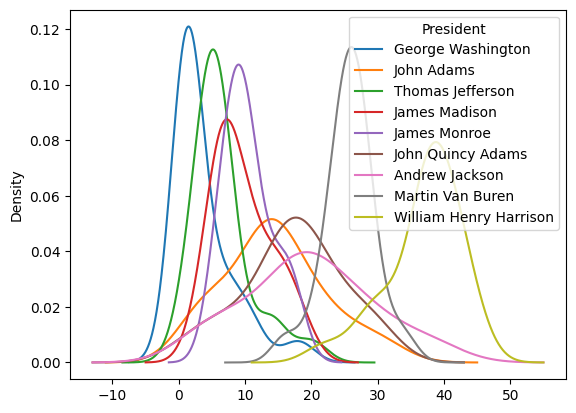

In [91]:
(pres
   .set_index('President')
   .loc[:, 'Background':'Average_rank']
   .iloc[:9]
   .T
   .plot.density()
)

<AxesSubplot:ylabel='Frequency'>

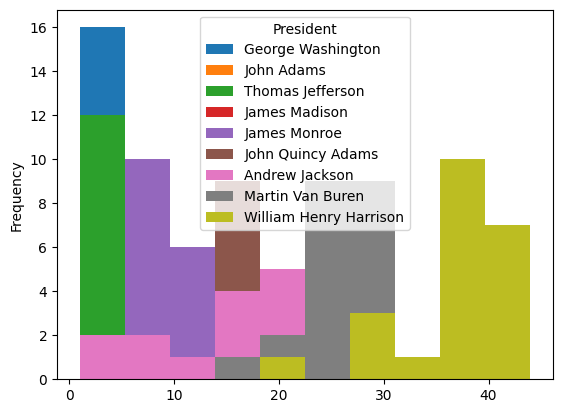

In [92]:
(pres
   .set_index('President')
   .loc[:, 'Background':'Average_rank']
   .iloc[:9]
   .T
   .plot.hist()
)

[Text(1, 0, 'George Washington'),
 Text(2, 0, 'John Adams'),
 Text(3, 0, 'Thomas Jefferson'),
 Text(4, 0, 'James Madison'),
 Text(5, 0, 'James Monroe'),
 Text(6, 0, 'John Quincy Adams'),
 Text(7, 0, 'Andrew Jackson'),
 Text(8, 0, 'Martin Van Buren'),
 Text(9, 0, 'William Henry Harrison')]

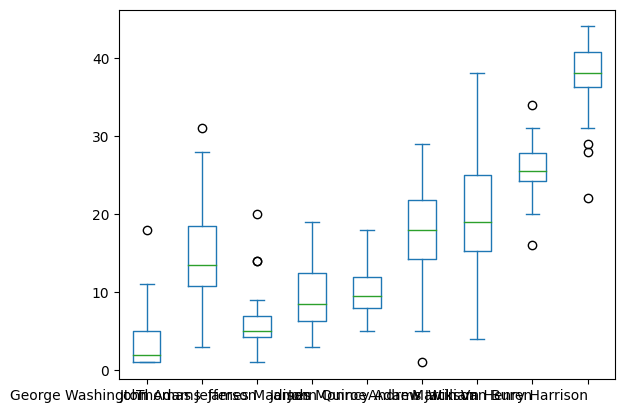

In [93]:
ax = (pres
   .set_index('President')
   .loc[:, 'Background':'Average_rank']
   .iloc[:9]
   .T
   .plot.box()
)
ax.set_xticklabels(labels=(pres.President[:9]), ha='right')

In [94]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      '2020-jetbrains-python-survey.csv'
jb = pd.read_csv(url)

/tmp/ipykernel_23592/1511582316.py:4: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  jb = pd.read_csv(url)


In [95]:
jb.filter(like='job.role')

job.role.DBA job.role.Architect job.role.QA engineer  \
0              NaN                NaN                  NaN   
1              NaN                NaN                  NaN   
2              NaN                NaN                  NaN   
3              NaN                NaN                  NaN   
4              NaN                NaN                  NaN   
...            ...                ...                  ...   
54457          NaN                NaN                  NaN   
54458          NaN                NaN                  NaN   
54459          NaN                NaN                  NaN   
54460          NaN                NaN                  NaN   
54461          NaN          Architect                  NaN   

      job.role.Developer / Programmer job.role.Technical writer  \
0                                 NaN                       NaN   
1              Developer / Programmer                       NaN   
2              Developer / Programmer                       NaN   
3                                 NaN                       NaN   
4                                 NaN                       NaN   
...                               ...                       ...   
54457                             NaN                       NaN   
54458                             NaN                       NaN   
54459                             NaN                       NaN   
54460          Developer / Programmer                       NaN   
54461          Developer / Programmer                       NaN   

      job.role.Technical support job.role.Data analyst  \
0                            NaN                   NaN   
1                            NaN                   NaN   
2              Technical support          Data analyst   
3                            NaN                   NaN   
4                            NaN                   NaN   
...                          ...                   ...   
54457                        NaN                   NaN   
54458                        NaN                   NaN   
54459                        NaN                   NaN   
54460                        NaN          Data analyst   
54461                        NaN                   NaN   

      job.role.Business analyst job.role.Team lead job.role.Product manager  \
0              Business analyst                NaN                      NaN   
1                           NaN                NaN                      NaN   
2                           NaN          Team lead                      NaN   
3                           NaN                NaN                      NaN   
4                           NaN                NaN                      NaN   
...                         ...                ...                      ...   
54457                       NaN                NaN                      NaN   
54458                       NaN                NaN                      NaN   
54459                       NaN                NaN                      NaN   
54460                       NaN                NaN                      NaN   
54461                       NaN          Team lead                      NaN   

      job.role.CIO / CEO / CTO job.role.Systems analyst job.role.Other  
0                          NaN                      NaN            NaN  
1                          NaN                      NaN            NaN  
2                          NaN                      NaN            NaN  
3                          NaN                      NaN            NaN  
4                          NaN                      NaN            NaN  
...                        ...                      ...            ...  
54457                      NaN          Systems analyst            NaN  
54458                      NaN                      NaN            NaN  
54459          CIO / CEO / CTO                      NaN            NaN  
54460                      NaN                      NaN            NaN  
54461  

In [96]:
(jb
 .filter(like=r'job.role.*t')
 .where(jb.isna(), 1)
)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[54462 rows x 0 columns]

In [97]:
(jb
 .filter(like=r'job.role.*t')
 .where(jb.isna(), 1)
 .fillna(0)
)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[54462 rows x 0 columns]

In [98]:
(jb
 .filter(like=r'job.role')
 .where(jb.isna(), 1)
 .fillna(0)
 .idxmax(axis='columns')
)

0              job.role.Business analyst
1        job.role.Developer / Programmer
2        job.role.Developer / Programmer
3                           job.role.DBA
4                           job.role.DBA
                      ...               
54457           job.role.Systems analyst
54458                       job.role.DBA
54459           job.role.CIO / CEO / CTO
54460    job.role.Developer / Programmer
54461                 job.role.Architect
Length: 54462, dtype: object

In [99]:
job = (jb
 .filter(like=r'job.role')
 .where(jb.isna(), 1)
 .fillna(0)
 .idxmax(axis='columns')
 .str.replace('job.role.', '', regex=False)
)
job

0              Business analyst
1        Developer / Programmer
2        Developer / Programmer
3                           DBA
4                           DBA
                  ...          
54457           Systems analyst
54458                       DBA
54459           CIO / CEO / CTO
54460    Developer / Programmer
54461                 Architect
Length: 54462, dtype: object

In [100]:
dum = pd.get_dummies(job)
dum

Architect  Business analyst  CIO / CEO / CTO  DBA  Data analyst  \
0              0                 1                0    0             0   
1              0                 0                0    0             0   
2              0                 0                0    0             0   
3              0                 0                0    1             0   
4              0                 0                0    1             0   
...          ...               ...              ...  ...           ...   
54457          0                 0                0    0             0   
54458          0                 0                0    1             0   
54459          0                 0                1    0             0   
54460          0                 0                0    0             0   
54461          1                 0                0    0             0   

       Developer / Programmer  Other  Product manager  QA engineer  \
0                           0      0                0            0   
1                           1      0                0            0   
2                           1      0                0            0   
3                           0      0                0            0   
4                           0      0                0            0   
...                       ...    ...              ...          ...   
54457                       0      0                0            0   
54458                       0      0                0            0   
54459                       0      0                0            0   
54460                       1      0                0            0   
54461                       0      0                0            0   

       Systems analyst  Team lead  Technical support  Technical writer  
0                    0          0                  0                 0  
1                    0          0                  0                 0  
2                    0          0                  0                 0  
3                    0          0                  0                 0  
4                    0          0                  0                 0  
...                ...        ...                ...               ...  
54457                1          0                  0                 0  
54458                0          0                  0                 0  
54459                0          0                  0                 0  
54460                0          0                  0                 0  
54461                0          0                  0                 0  

[54462 rows x 13 columns]

In [101]:
dum.idxmax(axis='columns')

0              Business analyst
1        Developer / Programmer
2        Developer / Programmer
3                           DBA
4                           DBA
                  ...          
54457           Systems analyst
54458                       DBA
54459           CIO / CEO / CTO
54460    Developer / Programmer
54461                 Architect
Length: 54462, dtype: object

In [102]:
i, j = np.where(dum)
pd.Series(dum.columns[j], i)

0              Business analyst
1        Developer / Programmer
2        Developer / Programmer
3                           DBA
4                           DBA
                  ...          
54457           Systems analyst
54458                       DBA
54459           CIO / CEO / CTO
54460    Developer / Programmer
54461                 Architect
Length: 54462, dtype: object

In [103]:
jb2

age are_you_datascientist  company_size        country_live  \
1       21                  True          5000               India   
2       30                 False          5000       United States   
10      21                 False            51       Other country   
11      21                  True            51       United States   
13      30                  True          5000             Belgium   
...    ...                   ...           ...                 ...   
54456   30                 False          1001              Turkey   
54457   21                 False             2  Russian Federation   
54459   21                 False             1  Russian Federation   
54460   30                  True            51               Spain   
54461   21                 False            11             Algeria   

                                       employment_status  \
1             Fully employed by a company / organization   
2             Fully employed by a company / organization   
10            Fully employed by a company / organization   
11            Fully employed by a company / organization   
13            Fully employed by a company / organization   
...                                                  ...   
54456         Fully employed by a company / organization   
54457         Fully employed by a company / organization   
54459  Self-employed (a person earning income directl...   
54460         Fully employed by a company / organization   
54461         Fully employed by a company / organization   

                      first_learn_about_main_ide how_often_use_main_ide  \
1                            School / University                  Daily   
2                             Friend / Colleague                  Daily   
10                           School / University                  Daily   
11      Online learning platform / Online course                  Daily   
13                                Social network                  Daily   
...                                          ...                    ...   
54456                         Friend / Colleague                  Daily   
54457                        School / University                  Daily   
54459                         Friend / Colleague                  Daily   
54460                             Search engines                  Daily   
54461   Online learning platform / Online course                  Daily   

                           ide_main is_python_main  \
1                           VS Code            Yes   
2                               Vim            Yes   
10                    IntelliJ IDEA            Yes   
11        PyCharm Community Edition            Yes   
13                          VS Code            Yes   
...                             ...            ...   
54456     PyCharm Community Edition            Yes   
54457                           Vim            Yes   
54459  PyCharm Professional Edition            Yes   
54460                         Other            Yes   
54461                       VS Code            Yes   

                                        job_team               main_purposes  \
1                                 Work in a team  Both for work and personal   
2      Work on your own project(s) independently  Both for work and personal   
10                                Work in a team  Both for work and personal   
11                                Work in a team  Both for work and personal   
13                                Work in a team  Both for work and personal   
...                                          ...                         ...   
54456  Work on your own project(s) independently  Both for work and personal   
54457  Work on your own project(s) independently  Both for work and personal   
54459                             Work in a team  Both for work and personal   
54460  Work on your own project(s) independently  Both for work and personal   
54461          

In [104]:
(jb2
 .pivot_table(index='country_live', columns='employment_status',
     values='age', aggfunc='mean')
)

TypeError: Int64

In [105]:
pd.crosstab(index=jb2.country_live, columns=jb2.employment_status,
    values=jb2.age, aggfunc='mean')

TypeError: Int64

In [106]:
(jb2
 .groupby(['country_live', 'employment_status'])
 .age
 .mean()
 .unstack()
)

employment_status  Freelancer (a person pursuing a profession without a long-term commitment to any one employer)  \
country_live                                                                                                        
Algeria                                                         <NA>                                                
Argentina                                                       <NA>                                                
Armenia                                                         <NA>                                                
Australia                                                       <NA>                                                
Austria                                                         <NA>                                                
...                                                              ...                                                
United States                                                   <NA>                                                
Uruguay                                                         <NA>                                                
Uzbekistan                                                      <NA>                                                
Venezuela                                                       <NA>                                                
Viet Nam                                                        <NA>                                                

employment_status  Fully employed by a company / organization  Other  \
country_live                                                           
Algeria                                                  31.2   <NA>   
Argentina                                           30.632184   <NA>   
Armenia                                             22.071429   <NA>   
Australia                                           32.935622   <NA>   
Austria                                             31.619565   <NA>   
...                                                       ...    ...   
United States                                       32.429163   <NA>   
Uruguay                                                  27.0   <NA>   
Uzbekistan                                               21.0   <NA>   
Venezuela                                           29.769231   <NA>   
Viet Nam                                            22.857143   <NA>   

employment_status  Partially employed by a company / organization  Retired  \
country_live                                                                 
Algeria                                                      24.0     <NA>   
Argentina                                               30.333333     <NA>   
Armenia                                                      <NA>     <NA>   
Australia                                                    28.0     <NA>   
Austria                                                 30.357143     <NA>   
...                                                           ...      ...   
United States                                                27.5     <NA>   
Uruguay                                                     30.25     <NA>   
Uzbekistan                                                   21.0     <NA>   
Venezuela                                               30.666667     <NA>   
Viet Nam                                                     <NA>     <NA>   

employment_status  Self-employed (a person earning income directly from one's own business, trade, or profession)  \
country_live                                                                                                        
Algeria                                                         27.0                                                
Argentina                                                       28.3                                                
Armenia                                                   

In [107]:
def per_emacs(ser):
    return ser.str.contains('Emacs').sum() / len(ser) * 100

In [108]:
def per_emacs(ser):
    return ser.str.contains('Emacs').mean() * 100

In [109]:
(jb2
 .pivot_table(index='country_live', values='ide_main', aggfunc=per_emacs)
)

ide_main
country_live           
Algeria        0.000000
Argentina      3.669725
Armenia        0.000000
Australia      3.649635
Austria        1.562500
...                 ...
United States  4.486466
Uruguay        0.000000
Uzbekistan     0.000000
Venezuela      0.000000
Viet Nam       0.000000

[76 rows x 1 columns]

In [110]:
pd.crosstab(index=jb2.country_live, 
    columns=jb2.assign(iden='emacs_per').iden,
    values=jb2.ide_main, aggfunc=per_emacs)

iden           emacs_per
country_live            
Algeria         0.000000
Argentina       3.669725
Armenia         0.000000
Australia       3.649635
Austria         1.562500
...                  ...
United States   4.486466
Uruguay         0.000000
Uzbekistan      0.000000
Venezuela       0.000000
Viet Nam        0.000000

[76 rows x 1 columns]

In [111]:
(jb2
 .groupby('country_live')
 [['ide_main']]
 .agg(per_emacs)
)

ide_main
country_live           
Algeria        0.000000
Argentina      3.669725
Armenia        0.000000
Australia      3.649635
Austria        1.562500
...                 ...
United States  4.486466
Uruguay        0.000000
Uzbekistan     0.000000
Venezuela      0.000000
Viet Nam       0.000000

[76 rows x 1 columns]

In [112]:
(jb2
    .pivot_table(index='country_live', values='age',
       aggfunc=(min, max))
)

max  min
country_live           
Algeria         60   18
Argentina       60   18
Armenia         30   18
Australia       60   18
Austria         50   18
...            ...  ...
United States   60   18
Uruguay         40   21
Uzbekistan      21   21
Venezuela       50   18
Viet Nam        60   18

[76 rows x 2 columns]

In [113]:
(jb2
 .groupby('country_live')
 .age
 .agg([min, max])
)

min  max
country_live           
Algeria         18   60
Argentina       18   60
Armenia         18   30
Australia       18   60
Austria         18   50
...            ...  ...
United States   18   60
Uruguay         21   40
Uzbekistan      21   21
Venezuela       18   50
Viet Nam        18   60

[76 rows x 2 columns]

In [114]:
pd.crosstab(jb2.country_live, values=jb2.age, aggfunc=(min, max),
    columns=jb2.assign(val='age').val)

max min
val           age age
country_live         
Algeria        60  18
Argentina      60  18
Armenia        30  18
Australia      60  18
Austria        50  18
...            ..  ..
United States  60  18
Uruguay        40  21
Uzbekistan     21  21
Venezuela      50  18
Viet Nam       60  18

[76 rows x 2 columns]

In [115]:
(jb2
 .pivot_table(index='country_live', 
              aggfunc=(min, max))
)

/tmp/ipykernel_23592/1580442386.py:1: FutureWarning: ['are_you_datascientist', 'employment_status', 'is_python_main'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  (jb2


age     company_size           first_learn_about_main_ide  \
              max min          max min                              max   
country_live                                                              
Algeria        60  18         5000   1  Technical review / Forum / Blog   
Argentina      60  18         5000   1  Technical review / Forum / Blog   
Armenia        30  18         5000   1  Technical review / Forum / Blog   
Australia      60  18         5000   1  Technical review / Forum / Blog   
Austria        50  18         5000   1  Technical review / Forum / Blog   
...            ..  ..          ...  ..                              ...   
United States  60  18         5000   1  Technical review / Forum / Blog   
Uruguay        40  21         5000   2  Technical review / Forum / Blog   
Uzbekistan     21  21         5000   1  Technical review / Forum / Blog   
Venezuela      50  18         5000   1  Technical review / Forum / Blog   
Viet Nam       60  18         5000   1  Technical review / Forum / Blog   

                                                          \
                                                     min   
country_live                                               
Algeria         Online learning platform / Online course   
Argentina       Online learning platform / Online course   
Armenia         Online learning platform / Online course   
Australia       Online learning platform / Online course   
Austria         Online learning platform / Online course   
...                                                  ...   
United States   Online learning platform / Online course   
Uruguay         Online learning platform / Online course   
Uzbekistan                                   Advertising   
Venezuela       Online learning platform / Online course   
Viet Nam        Online learning platform / Online course   

              how_often_use_main_ide                             ide_main  \
                                 max    min                           max   
country_live                                                                
Algeria                       Weekly  Daily                       VS Code   
Argentina                     Weekly  Daily                           Vim   
Armenia                       Weekly  Daily                           Vim   
Australia                     Weekly  Daily                           Vim   
Austria                       Weekly  Daily                           Vim   
...                              ...    ...                           ...   
United States                 Weekly  Daily                           Vim   
Uruguay                        Daily  Daily                           Vim   
Uzbekistan                     Daily  Daily  PyCharm Professional Edition   
Venezuela                    Monthly  Daily                           Vim   
Viet Nam                      Weekly  Daily                           Vim   

                                ... python_years       \
                           min  ...          max  min   
country_live                    ...                     
Algeria                   Atom  ...         11.0  1.0   
Argentina                 Atom  ...         11.0  1.0   
Armenia                   Atom  ...          6.0  1.0   
Australia                 Atom  ...         11.0  1.0   
Austria                   Atom  ...         11.0  1.0   
...                        ...  ...          ...  ...   
United States             Atom  ...         11.0  1.0   
Uruguay                  Other  ...         11.0  1.0   
Uzbekistan       IntelliJ IDEA  ...          3.0  1.0   
Venezuela      Eclipse + Pydev  ...         11.0  1.0   
Viet Nam                  Atom  ...          6.0  1.0   

                                                several_projects  \
                                                             max   
country_live                                                       
Algeria        Yes, I work on one main a

In [116]:
(jb2
 .groupby('country_live')
 .agg([min, max])
)

/tmp/ipykernel_23592/3154962276.py:1: FutureWarning: ['are_you_datascientist', 'employment_status', 'is_python_main'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  (jb2


age     company_size        \
              min max          min   max   
country_live                               
Algeria        18  60            1  5000   
Argentina      18  60            1  5000   
Armenia        18  30            1  5000   
Australia      18  60            1  5000   
Austria        18  50            1  5000   
...            ..  ..          ...   ...   
United States  18  60            1  5000   
Uruguay        21  40            2  5000   
Uzbekistan     21  21            1  5000   
Venezuela      18  50            1  5000   
Viet Nam       18  60            1  5000   

                              first_learn_about_main_ide  \
                                                     min   
country_live                                               
Algeria         Online learning platform / Online course   
Argentina       Online learning platform / Online course   
Armenia         Online learning platform / Online course   
Australia       Online learning platform / Online course   
Austria         Online learning platform / Online course   
...                                                  ...   
United States   Online learning platform / Online course   
Uruguay         Online learning platform / Online course   
Uzbekistan                                   Advertising   
Venezuela       Online learning platform / Online course   
Viet Nam        Online learning platform / Online course   

                                               how_often_use_main_ide  \
                                           max                    min   
country_live                                                            
Algeria        Technical review / Forum / Blog                  Daily   
Argentina      Technical review / Forum / Blog                  Daily   
Armenia        Technical review / Forum / Blog                  Daily   
Australia      Technical review / Forum / Blog                  Daily   
Austria        Technical review / Forum / Blog                  Daily   
...                                        ...                    ...   
United States  Technical review / Forum / Blog                  Daily   
Uruguay        Technical review / Forum / Blog                  Daily   
Uzbekistan     Technical review / Forum / Blog                  Daily   
Venezuela      Technical review / Forum / Blog                  Daily   
Viet Nam       Technical review / Forum / Blog                  Daily   

                               ide_main                                ...  \
                   max              min                           max  ...   
country_live                                                           ...   
Algeria         Weekly             Atom                       VS Code  ...   
Argentina       Weekly             Atom                           Vim  ...   
Armenia         Weekly             Atom                           Vim  ...   
Australia       Weekly             Atom                           Vim  ...   
Austria         Weekly             Atom                           Vim  ...   
...                ...              ...                           ...  ...   
United States   Weekly             Atom                           Vim  ...   
Uruguay          Daily            Other                           Vim  ...   
Uzbekistan       Daily    IntelliJ IDEA  PyCharm Professional Edition  ...   
Venezuela      Monthly  Eclipse + Pydev                           Vim  ...   
Viet Nam        Weekly             Atom                           Vim  ...   

                              several_projects  \
                                           min   
country_live                                     
Algeria        No,  I only work on one project   
Argentina      No,  I only work on one project   
Armenia        No,  I only work on one project   
Australia      No,  I only work on one project   
Austria        No,  I only work on one project   
...                                     

In [117]:
(jb2
 .pivot_table(index='country_live',
              aggfunc={'age': ['min', 'max'],
                       'team_size': 'mean'})
)

age     team_size
              max min      mean
country_live                   
Algeria        60  18  3.722222
Argentina      60  18  4.146789
Armenia        30  18  4.235294
Australia      60  18  3.354015
Austria        50  18  3.132812
...            ..  ..       ...
United States  60  18  4.072673
Uruguay        40  21  3.700000
Uzbekistan     21  21  2.750000
Venezuela      50  18  3.227273
Viet Nam       60  18  4.666667

[76 rows x 3 columns]

In [118]:
(jb2
 .groupby('country_live')
 .agg({'age': ['min', 'max'],
      'team_size': 'mean'})
)

age     team_size
              min max      mean
country_live                   
Algeria        18  60  3.722222
Argentina      18  60  4.146789
Armenia        18  30  4.235294
Australia      18  60  3.354015
Austria        18  50  3.132812
...            ..  ..       ...
United States  18  60  4.072673
Uruguay        21  40  3.700000
Uzbekistan     21  21  2.750000
Venezuela      18  50  3.227273
Viet Nam       18  60  4.666667

[76 rows x 3 columns]

In [119]:
(jb2
 .groupby('country_live')
 .agg(age_min=('age', min),
      age_max=('age', max),
      team_size_mean=('team_size', 'mean')
     )
)

age_min  age_max  team_size_mean
country_live                                   
Algeria             18       60        3.722222
Argentina           18       60        4.146789
Armenia             18       30        4.235294
Australia           18       60        3.354015
Austria             18       50        3.132812
...                ...      ...             ...
United States       18       60        4.072673
Uruguay             21       40        3.700000
Uzbekistan          21       21        2.750000
Venezuela           18       50        3.227273
Viet Nam            18       60        4.666667

[76 rows x 3 columns]

In [120]:
(jb2.pivot_table(index=['country_live', 'ide_main'], 
  values='age', aggfunc=[min, max]))

min max
                                          age age
country_live ide_main                            
Algeria      Atom                          21  60
             Eclipse + Pydev               18  18
             IDLE                          40  40
             Jupyter Notebook              30  30
             Other                         30  30
...                                        ..  ..
Viet Nam     Other                         21  21
             PyCharm Community Edition     21  30
             PyCharm Professional Edition  21  21
             VS Code                       18  30
             Vim                           21  40

[813 rows x 2 columns]

In [121]:
(jb2
 .groupby(by=['country_live', 'ide_main'])
 [['age']]
 .agg([min, max])
)

age      
                                                     min   max
country_live ide_main                                         
Algeria      Atom                                     21    60
             Eclipse + Pydev                          18    18
             Emacs                                  <NA>  <NA>
             IDLE                                     40    40
             IntelliJ IDEA                          <NA>  <NA>
...                                                  ...   ...
Viet Nam     Python Tools for Visual Studio (PTVS)  <NA>  <NA>
             Spyder                                 <NA>  <NA>
             Sublime Text                           <NA>  <NA>
             VS Code                                  18    30
             Vim                                      21    40

[1216 rows x 2 columns]

In [122]:
(jb2
 .groupby(by=['country_live', 'ide_main'])
 [['age']]
 .agg([min, max])
 .swaplevel(axis='columns')
)

min   max
                                                     age   age
country_live ide_main                                         
Algeria      Atom                                     21    60
             Eclipse + Pydev                          18    18
             Emacs                                  <NA>  <NA>
             IDLE                                     40    40
             IntelliJ IDEA                          <NA>  <NA>
...                                                  ...   ...
Viet Nam     Python Tools for Visual Studio (PTVS)  <NA>  <NA>
             Spyder                                 <NA>  <NA>
             Sublime Text                           <NA>  <NA>
             VS Code                                  18    30
             Vim                                      21    40

[1216 rows x 2 columns]

In [123]:
(jb2
 .groupby(by=['country_live', 'ide_main'])
 .agg(age_min=('age', min), age_max=('age', max))
)

age_min  age_max
country_live ide_main                                               
Algeria      Atom                                        21       60
             Eclipse + Pydev                             18       18
             Emacs                                     <NA>     <NA>
             IDLE                                        40       40
             IntelliJ IDEA                             <NA>     <NA>
...                                                     ...      ...
Viet Nam     Python Tools for Visual Studio (PTVS)     <NA>     <NA>
             Spyder                                    <NA>     <NA>
             Sublime Text                              <NA>     <NA>
             VS Code                                     18       30
             Vim                                         21       40

[1216 rows x 2 columns]

In [124]:
(jb2
 .groupby(by=['country_live', 'ide_main'], observed=True)
 .agg(age_min=('age', min), age_max=('age', max))
)

age_min  age_max
country_live       ide_main                                   
India              Atom                            18       40
                   Eclipse + Pydev                 18       40
                   Emacs                           21       40
                   IDLE                            18       40
                   IntelliJ IDEA                   21       30
...                                               ...      ...
Dominican Republic Vim                             21       21
Morocco            Jupyter Notebook                30       30
                   PyCharm Community Edition       21       40
                   Sublime Text                    21       30
                   VS Code                         21       30

[813 rows x 2 columns]

In [125]:
def even_grouper(idx):
    return 'odd' if idx % 2 else 'even'

In [126]:
jb2.pivot_table(index=even_grouper, aggfunc='size')

even    6849
odd     6862
dtype: int64

In [127]:
(jb2
 .groupby(even_grouper)
 .size()
)

even    6849
odd     6862
dtype: int64

In [128]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      '2020-jetbrains-python-survey.csv'
jb = pd.read_csv(url)
jb2 = tweak_jb(jb)

/tmp/ipykernel_23592/568134904.py:4: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  jb = pd.read_csv(url)


Learning rate set to 0.5
0:	learn: 2.9695218	total: 11ms	remaining: 209ms
1:	learn: 2.8766539	total: 20.1ms	remaining: 181ms
2:	learn: 2.8387189	total: 29.3ms	remaining: 166ms
3:	learn: 2.8028751	total: 35.4ms	remaining: 142ms
4:	learn: 2.7899957	total: 42.1ms	remaining: 126ms
5:	learn: 2.7749439	total: 48.1ms	remaining: 112ms
6:	learn: 2.7719128	total: 55.5ms	remaining: 103ms
7:	learn: 2.7649792	total: 63ms	remaining: 94.5ms
8:	learn: 2.7649588	total: 68.3ms	remaining: 83.5ms
9:	learn: 2.7630617	total: 75.2ms	remaining: 75.2ms
10:	learn: 2.7625779	total: 81.8ms	remaining: 66.9ms
11:	learn: 2.7515902	total: 86.5ms	remaining: 57.7ms
12:	learn: 2.7513459	total: 92ms	remaining: 49.6ms
13:	learn: 2.7445634	total: 98.2ms	remaining: 42.1ms
14:	learn: 2.7443257	total: 105ms	remaining: 35ms
15:	learn: 2.7423142	total: 110ms	remaining: 27.5ms
16:	learn: 2.7419143	total: 115ms	remaining: 20.3ms
17:	learn: 2.7399387	total: 120ms	remaining: 13.3ms
18:	learn: 2.7384296	total: 124ms	remaining: 6.55m

In [129]:
(jb2
 .groupby('country_live')
 .age
 .transform('size')
)

1        1063
2        2697
10        334
11       2697
13        135
         ... 
54456      99
54457     502
54459     502
54460     298
54461      18
Name: age, Length: 13711, dtype: int64

In [130]:
(jb2
 .assign(country_responses=(jb2
     .groupby('country_live')
     .age                                
     .transform('size')))
)

age are_you_datascientist  company_size        country_live  \
1       21                  True          5000               India   
2       30                 False          5000       United States   
10      21                 False            51       Other country   
11      21                  True            51       United States   
13      30                  True          5000             Belgium   
...    ...                   ...           ...                 ...   
54456   30                 False          1001              Turkey   
54457   21                 False             2  Russian Federation   
54459   21                 False             1  Russian Federation   
54460   30                  True            51               Spain   
54461   21                 False            11             Algeria   

                                       employment_status  \
1             Fully employed by a company / organization   
2             Fully employed by a company / organization   
10            Fully employed by a company / organization   
11            Fully employed by a company / organization   
13            Fully employed by a company / organization   
...                                                  ...   
54456         Fully employed by a company / organization   
54457         Fully employed by a company / organization   
54459  Self-employed (a person earning income directl...   
54460         Fully employed by a company / organization   
54461         Fully employed by a company / organization   

                      first_learn_about_main_ide how_often_use_main_ide  \
1                            School / University                  Daily   
2                             Friend / Colleague                  Daily   
10                           School / University                  Daily   
11      Online learning platform / Online course                  Daily   
13                                Social network                  Daily   
...                                          ...                    ...   
54456                         Friend / Colleague                  Daily   
54457                        School / University                  Daily   
54459                         Friend / Colleague                  Daily   
54460                             Search engines                  Daily   
54461   Online learning platform / Online course                  Daily   

                           ide_main is_python_main  \
1                           VS Code            Yes   
2                               Vim            Yes   
10                    IntelliJ IDEA            Yes   
11        PyCharm Community Edition            Yes   
13                          VS Code            Yes   
...                             ...            ...   
54456     PyCharm Community Edition            Yes   
54457                           Vim            Yes   
54459  PyCharm Professional Edition            Yes   
54460                         Other            Yes   
54461                       VS Code            Yes   

                                        job_team  ...  \
1                                 Work in a team  ...   
2      Work on your own project(s) independently  ...   
10                                Work in a team  ...   
11                                Work in a team  ...   
13                                Work in a team  ...   
...                                          ...  ...   
54456  Work on your own project(s) independently  ...   
54457  Work on your own project(s) independently  ...   
54459                             Work in a team  ...   
54460  Work on your own project(s) independently  ...   
54461                             Work in a team  ...   

                missing_features_main_ide nps_main_ide  python_years  \
1      No, it has all the features I need          8.0           3.0   
2      No, it has all the features I need         10.0           3

In [131]:
(jb2
 .country_live
 .value_counts())

United States     2697
Germany           1137
India             1063
United Kingdom     699
France             674
                  ... 
Saudi Arabia        12
Sri Lanka           10
Morocco              9
Tunisia              7
Uzbekistan           4
Name: country_live, Length: 76, dtype: int64

In [132]:
(jb2
 .country_live
 .value_counts()
 .median())

60.5

In [133]:
countries_to_remove = (jb2
                       .country_live
                       .value_counts()
                       .lt(60.5))
countries_to_remove[countries_to_remove]

Pakistan        True
Hungary         True
Chile           True
Indonesia       True
Singapore       True
                ... 
Saudi Arabia    True
Sri Lanka       True
Morocco         True
Tunisia         True
Uzbekistan      True
Name: country_live, Length: 38, dtype: bool

In [134]:
(jb2
 .query('~country_live.isin(@countries_to_remove)')
)

age are_you_datascientist  company_size        country_live  \
1       21                  True          5000               India   
2       30                 False          5000       United States   
10      21                 False            51       Other country   
11      21                  True            51       United States   
13      30                  True          5000             Belgium   
...    ...                   ...           ...                 ...   
54456   30                 False          1001              Turkey   
54457   21                 False             2  Russian Federation   
54459   21                 False             1  Russian Federation   
54460   30                  True            51               Spain   
54461   21                 False            11             Algeria   

                                       employment_status  \
1             Fully employed by a company / organization   
2             Fully employed by a company / organization   
10            Fully employed by a company / organization   
11            Fully employed by a company / organization   
13            Fully employed by a company / organization   
...                                                  ...   
54456         Fully employed by a company / organization   
54457         Fully employed by a company / organization   
54459  Self-employed (a person earning income directl...   
54460         Fully employed by a company / organization   
54461         Fully employed by a company / organization   

                      first_learn_about_main_ide how_often_use_main_ide  \
1                            School / University                  Daily   
2                             Friend / Colleague                  Daily   
10                           School / University                  Daily   
11      Online learning platform / Online course                  Daily   
13                                Social network                  Daily   
...                                          ...                    ...   
54456                         Friend / Colleague                  Daily   
54457                        School / University                  Daily   
54459                         Friend / Colleague                  Daily   
54460                             Search engines                  Daily   
54461   Online learning platform / Online course                  Daily   

                           ide_main is_python_main  \
1                           VS Code            Yes   
2                               Vim            Yes   
10                    IntelliJ IDEA            Yes   
11        PyCharm Community Edition            Yes   
13                          VS Code            Yes   
...                             ...            ...   
54456     PyCharm Community Edition            Yes   
54457                           Vim            Yes   
54459  PyCharm Professional Edition            Yes   
54460                         Other            Yes   
54461                       VS Code            Yes   

                                        job_team               main_purposes  \
1                                 Work in a team  Both for work and personal   
2      Work on your own project(s) independently  Both for work and personal   
10                                Work in a team  Both for work and personal   
11                                Work in a team  Both for work and personal   
13                                Work in a team  Both for work and personal   
...                                          ...                         ...   
54456  Work on your own project(s) independently  Both for work and personal   
54457  Work on your own project(s) independently  Both for work and personal   
54459                             Work in a team  Both for work and personal   
54460  Work on your own project(s) independently  Both for work and personal   
54461          

In [135]:
(jb2
 .groupby('country_live')
 .filter(lambda g: g.country_live.size >= 60.5)
)

age are_you_datascientist  company_size        country_live  \
1       21                  True          5000               India   
2       30                 False          5000       United States   
10      21                 False            51       Other country   
11      21                  True            51       United States   
13      30                  True          5000             Belgium   
...    ...                   ...           ...                 ...   
54450   30                 False            51       United States   
54456   30                 False          1001              Turkey   
54457   21                 False             2  Russian Federation   
54459   21                 False             1  Russian Federation   
54460   30                  True            51               Spain   

                                       employment_status  \
1             Fully employed by a company / organization   
2             Fully employed by a company / organization   
10            Fully employed by a company / organization   
11            Fully employed by a company / organization   
13            Fully employed by a company / organization   
...                                                  ...   
54450         Fully employed by a company / organization   
54456         Fully employed by a company / organization   
54457         Fully employed by a company / organization   
54459  Self-employed (a person earning income directl...   
54460         Fully employed by a company / organization   

                      first_learn_about_main_ide how_often_use_main_ide  \
1                            School / University                  Daily   
2                             Friend / Colleague                  Daily   
10                           School / University                  Daily   
11      Online learning platform / Online course                  Daily   
13                                Social network                  Daily   
...                                          ...                    ...   
54450                         Friend / Colleague                  Daily   
54456                         Friend / Colleague                  Daily   
54457                        School / University                  Daily   
54459                         Friend / Colleague                  Daily   
54460                             Search engines                  Daily   

                           ide_main is_python_main  \
1                           VS Code            Yes   
2                               Vim            Yes   
10                    IntelliJ IDEA            Yes   
11        PyCharm Community Edition            Yes   
13                          VS Code            Yes   
...                             ...            ...   
54450  PyCharm Professional Edition            Yes   
54456     PyCharm Community Edition            Yes   
54457                           Vim            Yes   
54459  PyCharm Professional Edition            Yes   
54460                         Other            Yes   

                                        job_team               main_purposes  \
1                                 Work in a team  Both for work and personal   
2      Work on your own project(s) independently  Both for work and personal   
10                                Work in a team  Both for work and personal   
11                                Work in a team  Both for work and personal   
13                                Work in a team  Both for work and personal   
...                                          ...                         ...   
54450                             Work in a team                    For work   
54456  Work on your own project(s) independently  Both for work and personal   
54457  Work on your own project(s) independently  Both for work and personal   
54459                             Work in a team  Both for work and personal   
54460  Work on 

In [136]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      '2020-jetbrains-python-survey.csv'
jb = pd.read_csv(url)
jb2 = tweak_jb(jb)

/tmp/ipykernel_23592/568134904.py:4: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  jb = pd.read_csv(url)


Learning rate set to 0.5
0:	learn: 2.9695218	total: 6.82ms	remaining: 130ms
1:	learn: 2.8766539	total: 13.5ms	remaining: 121ms
2:	learn: 2.8387189	total: 20.2ms	remaining: 114ms
3:	learn: 2.8028751	total: 25.4ms	remaining: 102ms
4:	learn: 2.7899957	total: 31.9ms	remaining: 95.8ms
5:	learn: 2.7749439	total: 37.9ms	remaining: 88.5ms
6:	learn: 2.7719128	total: 44.2ms	remaining: 82.1ms
7:	learn: 2.7649792	total: 49.2ms	remaining: 73.8ms
8:	learn: 2.7649588	total: 53.5ms	remaining: 65.4ms
9:	learn: 2.7630617	total: 58.3ms	remaining: 58.3ms
10:	learn: 2.7625779	total: 63.5ms	remaining: 51.9ms
11:	learn: 2.7515902	total: 68.1ms	remaining: 45.4ms
12:	learn: 2.7513459	total: 72.9ms	remaining: 39.3ms
13:	learn: 2.7445634	total: 77.7ms	remaining: 33.3ms
14:	learn: 2.7443257	total: 82.4ms	remaining: 27.5ms
15:	learn: 2.7423142	total: 86.9ms	remaining: 21.7ms
16:	learn: 2.7419143	total: 92.2ms	remaining: 16.3ms
17:	learn: 2.7399387	total: 97.7ms	remaining: 10.9ms
18:	learn: 2.7384296	total: 102ms	r

In [137]:
pd.crosstab(index=jb2.country_live, columns=jb2.age)

age            18   21    30   40   50   60
country_live                               
Algeria         2    7     5    3    0    1
Argentina       1   38    44   20    5    1
Armenia         1   13     3    0    0    0
Australia       4   58   110   63   30    9
Austria         1   31    62   22   12    0
...            ..  ...   ...  ...  ...  ...
United States  40  753  1042  478  264  120
Uruguay         0    6    13    1    0    0
Uzbekistan      0    4     0    0    0    0
Venezuela       1   10     4    5    2    0
Viet Nam        1   26     4    1    0    1

[76 rows x 6 columns]

In [138]:
pd.crosstab(index=jb2.country_live, columns=jb2.age,
    margins=True)

age            18    21    30    40   50   60    All
country_live                                        
Algeria         2     7     5     3    0    1     18
Argentina       1    38    44    20    5    1    109
Armenia         1    13     3     0    0    0     17
Australia       4    58   110    63   30    9    274
Austria         1    31    62    22   12    0    128
...           ...   ...   ...   ...  ...  ...    ...
Uruguay         0     6    13     1    0    0     20
Uzbekistan      0     4     0     0    0    0      4
Venezuela       1    10     4     5    2    0     22
Viet Nam        1    26     4     1    0    1     33
All           315  5270  5054  2028  822  222  13711

[77 rows x 7 columns]

In [139]:
pd.crosstab(index=jb2.country_live, columns=jb2.age,
    normalize=True)

age                  18        21        30        40        50        60
country_live                                                             
Algeria        0.000146  0.000511  0.000365  0.000219  0.000000  0.000073
Argentina      0.000073  0.002771  0.003209  0.001459  0.000365  0.000073
Armenia        0.000073  0.000948  0.000219  0.000000  0.000000  0.000000
Australia      0.000292  0.004230  0.008023  0.004595  0.002188  0.000656
Austria        0.000073  0.002261  0.004522  0.001605  0.000875  0.000000
...                 ...       ...       ...       ...       ...       ...
United States  0.002917  0.054919  0.075997  0.034863  0.019255  0.008752
Uruguay        0.000000  0.000438  0.000948  0.000073  0.000000  0.000000
Uzbekistan     0.000000  0.000292  0.000000  0.000000  0.000000  0.000000
Venezuela      0.000073  0.000729  0.000292  0.000365  0.000146  0.000000
Viet Nam       0.000073  0.001896  0.000292  0.000073  0.000000  0.000073

[76 rows x 6 columns]

In [140]:
pd.crosstab(index=jb2.country_live, columns=jb2.age,
    normalize='columns')

age                  18        21        30        40        50        60
country_live                                                             
Algeria        0.006349  0.001328  0.000989  0.001479  0.000000  0.004505
Argentina      0.003175  0.007211  0.008706  0.009862  0.006083  0.004505
Armenia        0.003175  0.002467  0.000594  0.000000  0.000000  0.000000
Australia      0.012698  0.011006  0.021765  0.031065  0.036496  0.040541
Austria        0.003175  0.005882  0.012268  0.010848  0.014599  0.000000
...                 ...       ...       ...       ...       ...       ...
United States  0.126984  0.142884  0.206173  0.235700  0.321168  0.540541
Uruguay        0.000000  0.001139  0.002572  0.000493  0.000000  0.000000
Uzbekistan     0.000000  0.000759  0.000000  0.000000  0.000000  0.000000
Venezuela      0.003175  0.001898  0.000791  0.002465  0.002433  0.000000
Viet Nam       0.003175  0.004934  0.000791  0.000493  0.000000  0.004505

[76 rows x 6 columns]

In [141]:
pd.crosstab(index=jb2.country_live, columns=jb2.age,
    normalize='index')

age                  18        21        30        40        50        60
country_live                                                             
Algeria        0.111111  0.388889  0.277778  0.166667  0.000000  0.055556
Argentina      0.009174  0.348624  0.403670  0.183486  0.045872  0.009174
Armenia        0.058824  0.764706  0.176471  0.000000  0.000000  0.000000
Australia      0.014599  0.211679  0.401460  0.229927  0.109489  0.032847
Austria        0.007812  0.242188  0.484375  0.171875  0.093750  0.000000
...                 ...       ...       ...       ...       ...       ...
United States  0.014831  0.279199  0.386355  0.177234  0.097887  0.044494
Uruguay        0.000000  0.300000  0.650000  0.050000  0.000000  0.000000
Uzbekistan     0.000000  1.000000  0.000000  0.000000  0.000000  0.000000
Venezuela      0.045455  0.454545  0.181818  0.227273  0.090909  0.000000
Viet Nam       0.030303  0.787879  0.121212  0.030303  0.000000  0.030303

[76 rows x 6 columns]

In [142]:
(pd.crosstab(index=[jb2.country_live, jb2.age],
    columns=[jb2.use_python_most, jb2.python3_version_most])
 .loc[['United States']]
)

use_python_most        Computer graphics                                   \
python3_version_most Python 3_5 or lower Python 3_6 Python 3_7 Python 3_8   
country_live  age                                                           
United States 18                       0          0          0          0   
              21                       0          0          1          1   
              30                       0          0          0          1   
              40                       0          0          0          3   
              50                       0          0          1          2   
              60                       0          0          1          0   

use_python_most                       Data analysis                        \
python3_version_most Python 3_9 Python 3_5 or lower Python 3_6 Python 3_7   
country_live  age                                                           
United States 18              0                   0          0          1   
              21              1                   1         18         48   
              30              0                   3         29         66   
              40              0                   0         14         30   
              50              0                   2          6         26   
              60              0                   0          1         11   

use_python_most                             ...             Unknown  \
python3_version_most Python 3_8 Python 3_9  ... Python 3_5 or lower   
country_live  age                           ...                       
United States 18              5          0  ...                   0   
              21             64         11  ...                   0   
              30             90         12  ...                   0   
              40             45          3  ...                   2   
              50             36          1  ...                   1   
              60             11          1  ...                   0   

use_python_most                                                   \
python3_version_most Python 3_6 Python 3_7 Python 3_8 Python 3_9   
country_live  age                                                  
United States 18              1          0          1          0   
              21             10         13         11          4   
              30              7         19         14          4   
              40              5          5          2          4   
              50              2          3          6          0   
              60              4          2          3          0   

use_python_most          Web development                                   \
python3_version_most Python 3_5 or lower Python 3_6 Python 3_7 Python 3_8   
country_live  age                                                           
United States 18                       0          0          1          4   
              21                       3         28         54         81   
              30                       3         60         77        129   
              40                       1         14         26         66   
              50                       0         10         12         14   
              60                       0          3          5          5   

use_python_most                  
python3_version_most Python 3_9  
country_live  age                
United States 18              0  
              21              4  
              30             14  
              40              8  
              50              2  
              60              1  

[6 rows x 84 columns]

In [143]:
(pd.crosstab(index=[jb2.country_live, jb2.age],
    columns=[jb2.use_python_most, jb2.python3_version_most])
 .loc[['United States'], ['Data analysis', 'Web development']]
)

use_python_most            Data analysis                                   \
python3_version_most Python 3_5 or lower Python 3_6 Python 3_7 Python 3_8   
country_live  age                                                           
United States 18                       0          0          1          5   
              21                       1         18         48         64   
              30                       3         29         66         90   
              40                       0         14         30         45   
              50                       2          6         26         36   
              60                       0          1         11         11   

use_python_most                     Web development                        \
python3_version_most Python 3_9 Python 3_5 or lower Python 3_6 Python 3_7   
country_live  age                                                           
United States 18              0                   0          0          1   
              21             11                   3         28         54   
              30             12                   3         60         77   
              40              3                   1         14         26   
              50              1                   0         10         12   
              60              1                   0          3          5   

use_python_most                             
python3_version_most Python 3_8 Python 3_9  
country_live  age                           
United States 18              4          0  
              21             81          4  
              30            129         14  
              40             66          8  
              50             14          2  
              60              5          1

In [144]:
scores = pd.DataFrame({
 'name':['Adam', 'Bob', 'Dave', 'Fred'],
 'age': [15, 16, 16, 15],
 'test1': [95, 81, 89, None],
 'test2': [80, 82, 84, 88],
 'teacher': ['Ashby', 'Ashby', 'Jones', 'Jones']})

In [145]:
scores

name  age  test1  test2 teacher
0  Adam   15   95.0     80   Ashby
1   Bob   16   81.0     82   Ashby
2  Dave   16   89.0     84   Jones
3  Fred   15    NaN     88   Jones

In [146]:
scores.melt(id_vars=['name', 'age'],
        value_vars=['test1', 'test2'])

name  age variable  value
0  Adam   15    test1   95.0
1   Bob   16    test1   81.0
2  Dave   16    test1   89.0
3  Fred   15    test1    NaN
4  Adam   15    test2   80.0
5   Bob   16    test2   82.0
6  Dave   16    test2   84.0
7  Fred   15    test2   88.0

In [147]:
(scores
 .groupby(['name', 'age'])
 .apply(lambda g: pd.concat([
    g[['test1']].rename(columns={'test1':'val'}).assign(var='test1'),
    g[['test2']].rename(columns={'test2':'val'}).assign(var='test2')]))
 .reset_index()
 .drop(columns='level_2')
)

name  age   val    var
0  Adam   15  95.0  test1
1  Adam   15  80.0  test2
2   Bob   16  81.0  test1
3   Bob   16  82.0  test2
4  Dave   16  89.0  test1
5  Dave   16  84.0  test2
6  Fred   15   NaN  test1
7  Fred   15  88.0  test2

In [148]:
scores.melt(id_vars=['name', 'age'],
        value_vars=['test1', 'test2'],
        var_name='test', value_name='score')

name  age   test  score
0  Adam   15  test1   95.0
1   Bob   16  test1   81.0
2  Dave   16  test1   89.0
3  Fred   15  test1    NaN
4  Adam   15  test2   80.0
5   Bob   16  test2   82.0
6  Dave   16  test2   84.0
7  Fred   15  test2   88.0

In [149]:
scores.melt(id_vars=['name', 'age', 'teacher'],
        value_vars=['test1', 'test2'],
        var_name='test', value_name='score')

name  age teacher   test  score
0  Adam   15   Ashby  test1   95.0
1   Bob   16   Ashby  test1   81.0
2  Dave   16   Jones  test1   89.0
3  Fred   15   Jones  test1    NaN
4  Adam   15   Ashby  test2   80.0
5   Bob   16   Ashby  test2   82.0
6  Dave   16   Jones  test2   84.0
7  Fred   15   Jones  test2   88.0

In [150]:
melted = scores.melt(id_vars=['name', 'age', 'teacher'],
        value_vars=['test1', 'test2'],
        var_name='test', value_name='score')
melted

name  age teacher   test  score
0  Adam   15   Ashby  test1   95.0
1   Bob   16   Ashby  test1   81.0
2  Dave   16   Jones  test1   89.0
3  Fred   15   Jones  test1    NaN
4  Adam   15   Ashby  test2   80.0
5   Bob   16   Ashby  test2   82.0
6  Dave   16   Jones  test2   84.0
7  Fred   15   Jones  test2   88.0

In [151]:
(melted
 .pivot_table(index=['name','age', 'teacher'],
              columns='test', values='score')
 .reset_index())

test  name  age teacher  test1  test2
0     Adam   15   Ashby   95.0   80.0
1      Bob   16   Ashby   81.0   82.0
2     Dave   16   Jones   89.0   84.0
3     Fred   15   Jones    NaN   88.0

In [152]:
(melted
 .groupby(['name', 'age', 'teacher', 'test'])
 .score
 .mean()
 .unstack()
 .reset_index()
)

test  name  age teacher  test1  test2
0     Adam   15   Ashby   95.0   80.0
1      Bob   16   Ashby   81.0   82.0
2     Dave   16   Jones   89.0   84.0
3     Fred   15   Jones    NaN   88.0

In [153]:
import pandas as pd
url = 'https://github.com/mattharrison/datasets/raw/master/data/'\
      '2020-jetbrains-python-survey.csv'
jb = pd.read_csv(url)
jb2 = tweak_jb(jb)

/tmp/ipykernel_23592/568134904.py:4: DtypeWarning: Columns (152) have mixed types. Specify dtype option on import or set low_memory=False.
  jb = pd.read_csv(url)


Learning rate set to 0.5
0:	learn: 2.9695218	total: 6.49ms	remaining: 123ms
1:	learn: 2.8766539	total: 13.1ms	remaining: 118ms
2:	learn: 2.8387189	total: 19.5ms	remaining: 111ms
3:	learn: 2.8028751	total: 25.9ms	remaining: 104ms
4:	learn: 2.7899957	total: 31.3ms	remaining: 93.8ms
5:	learn: 2.7749439	total: 36.3ms	remaining: 84.8ms
6:	learn: 2.7719128	total: 41ms	remaining: 76.1ms
7:	learn: 2.7649792	total: 46.1ms	remaining: 69.1ms
8:	learn: 2.7649588	total: 50.5ms	remaining: 61.7ms
9:	learn: 2.7630617	total: 55.3ms	remaining: 55.3ms
10:	learn: 2.7625779	total: 60.7ms	remaining: 49.7ms
11:	learn: 2.7515902	total: 65.4ms	remaining: 43.6ms
12:	learn: 2.7513459	total: 70.4ms	remaining: 37.9ms
13:	learn: 2.7445634	total: 75.1ms	remaining: 32.2ms
14:	learn: 2.7443257	total: 80.1ms	remaining: 26.7ms
15:	learn: 2.7423142	total: 85.8ms	remaining: 21.4ms
16:	learn: 2.7419143	total: 90.5ms	remaining: 16ms
17:	learn: 2.7399387	total: 95.7ms	remaining: 10.6ms
18:	learn: 2.7384296	total: 100ms	remai

In [154]:
jb2

age are_you_datascientist  company_size        country_live  \
1       21                  True          5000               India   
2       30                 False          5000       United States   
10      21                 False            51       Other country   
11      21                  True            51       United States   
13      30                  True          5000             Belgium   
...    ...                   ...           ...                 ...   
54456   30                 False          1001              Turkey   
54457   21                 False             2  Russian Federation   
54459   21                 False             1  Russian Federation   
54460   30                  True            51               Spain   
54461   21                 False            11             Algeria   

                                       employment_status  \
1             Fully employed by a company / organization   
2             Fully employed by a company / organization   
10            Fully employed by a company / organization   
11            Fully employed by a company / organization   
13            Fully employed by a company / organization   
...                                                  ...   
54456         Fully employed by a company / organization   
54457         Fully employed by a company / organization   
54459  Self-employed (a person earning income directl...   
54460         Fully employed by a company / organization   
54461         Fully employed by a company / organization   

                      first_learn_about_main_ide how_often_use_main_ide  \
1                            School / University                  Daily   
2                             Friend / Colleague                  Daily   
10                           School / University                  Daily   
11      Online learning platform / Online course                  Daily   
13                                Social network                  Daily   
...                                          ...                    ...   
54456                         Friend / Colleague                  Daily   
54457                        School / University                  Daily   
54459                         Friend / Colleague                  Daily   
54460                             Search engines                  Daily   
54461   Online learning platform / Online course                  Daily   

                           ide_main is_python_main  \
1                           VS Code            Yes   
2                               Vim            Yes   
10                    IntelliJ IDEA            Yes   
11        PyCharm Community Edition            Yes   
13                          VS Code            Yes   
...                             ...            ...   
54456     PyCharm Community Edition            Yes   
54457                           Vim            Yes   
54459  PyCharm Professional Edition            Yes   
54460                         Other            Yes   
54461                       VS Code            Yes   

                                        job_team               main_purposes  \
1                                 Work in a team  Both for work and personal   
2      Work on your own project(s) independently  Both for work and personal   
10                                Work in a team  Both for work and personal   
11                                Work in a team  Both for work and personal   
13                                Work in a team  Both for work and personal   
...                                          ...                         ...   
54456  Work on your own project(s) independently  Both for work and personal   
54457  Work on your own project(s) independently  Both for work and personal   
54459                             Work in a team  Both for work and personal   
54460  Work on your own project(s) independently  Both for work and personal   
54461          

In [155]:
(jb2
  .groupby(['country_live', 'are_you_datascientist'])
  .size()
)

country_live  are_you_datascientist
Algeria       False                    12
              True                      5
              Other                     1
Argentina     False                    89
              True                     16
                                       ..
Venezuela     True                      4
              Other                     2
Viet Nam      False                    16
              True                     14
              Other                     3
Length: 228, dtype: int64

In [156]:
(jb2
  .groupby(['country_live', 'are_you_datascientist'])
  .size()
  .unstack()
)

are_you_datascientist  False  True  Other
country_live                             
Algeria                   12     5      1
Argentina                 89    16      4
Armenia                   15     2      0
Australia                210    50     14
Austria                   93    32      3
...                      ...   ...    ...
United States           2008   589    100
Uruguay                   10     9      1
Uzbekistan                 3     1      0
Venezuela                 16     4      2
Viet Nam                  16    14      3

[76 rows x 3 columns]

In [157]:
(jb2
  .groupby(['country_live', 'are_you_datascientist'])
  .size()
  .unstack(0)
)

country_live           Algeria  Argentina  Armenia  Australia  Austria  \
are_you_datascientist                                                    
False                       12         89       15        210       93   
True                         5         16        2         50       32   
Other                        1          4        0         14        3   

country_live           Bangladesh  Belarus  Belgium  Brazil  Bulgaria  ...  \
are_you_datascientist                                                  ...   
False                          22       41       92     301        30  ...   
True                           10        4       41     108         8  ...   
Other                           1        2        2      20         3  ...   

country_live           Tunisia  Turkey  Ukraine  United Arab Emirates  \
are_you_datascientist                                                   
False                        6      65      165                    13   
True                         1      30       23                     4   
Other                        0       4        9                     0   

country_live           United Kingdom  United States  Uruguay  Uzbekistan  \
are_you_datascientist                                                       
False                             521           2008       10           3   
True                              142            589        9           1   
Other                              36            100        1           0   

country_live           Venezuela  Viet Nam  
are_you_datascientist                       
False                         16        16  
True                           4        14  
Other                          2         3  

[3 rows x 76 columns]

In [158]:
(jb2
  .groupby(['country_live', 'are_you_datascientist'])
  .size()
  .unstack('country_live')
)

country_live           Algeria  Argentina  Armenia  Australia  Austria  \
are_you_datascientist                                                    
False                       12         89       15        210       93   
True                         5         16        2         50       32   
Other                        1          4        0         14        3   

country_live           Bangladesh  Belarus  Belgium  Brazil  Bulgaria  ...  \
are_you_datascientist                                                  ...   
False                          22       41       92     301        30  ...   
True                           10        4       41     108         8  ...   
Other                           1        2        2      20         3  ...   

country_live           Tunisia  Turkey  Ukraine  United Arab Emirates  \
are_you_datascientist                                                   
False                        6      65      165                    13   
True                         1      30       23                     4   
Other                        0       4        9                     0   

country_live           United Kingdom  United States  Uruguay  Uzbekistan  \
are_you_datascientist                                                       
False                             521           2008       10           3   
True                              142            589        9           1   
Other                              36            100        1           0   

country_live           Venezuela  Viet Nam  
are_you_datascientist                       
False                         16        16  
True                           4        14  
Other                          2         3  

[3 rows x 76 columns]

In [159]:
(jb2
 .pivot_table(index='country_live',
              aggfunc={'age': ['min', 'max'],
                       'company_size': ['min', 'max']})
)

age     company_size    
              max min          max min
country_live                          
Algeria        60  18         5000   1
Argentina      60  18         5000   1
Armenia        30  18         5000   1
Australia      60  18         5000   1
Austria        50  18         5000   1
...            ..  ..          ...  ..
United States  60  18         5000   1
Uruguay        40  21         5000   2
Uzbekistan     21  21         5000   1
Venezuela      50  18         5000   1
Viet Nam       60  18         5000   1

[76 rows x 4 columns]

In [160]:
(jb2
 .pivot_table(index='country_live',
              aggfunc={'age': ['min', 'max'],
                       'company_size': ['min', 'max']})
 .stack(0)
)

max  min
country_live                        
Algeria      age             60   18
             company_size  5000    1
Argentina    age             60   18
             company_size  5000    1
Armenia      age             30   18
...                         ...  ...
Uzbekistan   company_size  5000    1
Venezuela    age             50   18
             company_size  5000    1
Viet Nam     age             60   18
             company_size  5000    1

[152 rows x 2 columns]

In [161]:
(jb2
 .pivot_table(index='country_live',
              aggfunc={'age': ['min', 'max'],
                       'company_size': ['min', 'max']})
 .stack(1)
)

age  company_size
country_live                       
Algeria      max   60          5000
             min   18             1
Argentina    max   60          5000
             min   18             1
Armenia      max   30          5000
...               ...           ...
Uzbekistan   min   21             1
Venezuela    max   50          5000
             min   18             1
Viet Nam     max   60          5000
             min   18             1

[152 rows x 2 columns]

In [162]:
(jb2
 .pivot_table(index='country_live',
              aggfunc={'age': ['min', 'max'],
                       'company_size': ['min', 'max']})
 .stack(1)
 .swaplevel()
)

age  company_size
    country_live                   
max Algeria        60          5000
min Algeria        18             1
max Argentina      60          5000
min Argentina      18             1
max Armenia        30          5000
...               ...           ...
min Uzbekistan     21             1
max Venezuela      50          5000
min Venezuela      18             1
max Viet Nam       60          5000
min Viet Nam       18             1

[152 rows x 2 columns]

In [163]:
(jb2
 .groupby(['country_live', 'age'])
 .mean()
)

company_size  nps_main_ide  python_years  team_size  \
country_live age                                                        
Algeria      18            2.0     10.000000      1.000000   2.500000   
             21     725.428571      7.142857      1.571429   3.142857   
             30            1.6      8.400000      2.800000   1.800000   
             40         1674.0      8.000000      5.000000   6.000000   
             50           <NA>           NaN           NaN        NaN   
...                        ...           ...           ...        ...   
Viet Nam     21     348.346154      8.923077      2.192308   4.884615   
             30         266.25      9.000000      3.250000   5.500000   
             40           51.0      9.000000      3.000000   2.000000   
             50           <NA>           NaN           NaN        NaN   
             60            1.0      8.000000      3.000000   1.000000   

                  years_of_coding  python3_ver  
country_live age                                
Algeria      18          6.000000     3.650000  
             21          2.428571     3.757143  
             30          3.800000     3.700000  
             40          6.666667     3.766667  
             50               NaN          NaN  
...                           ...          ...  
Viet Nam     21          1.923077     3.711538  
             30          3.500000     3.750000  
             40          6.000000     3.800000  
             50               NaN          NaN  
             60          1.000000     3.900000  

[456 rows x 6 columns]

In [164]:
(jb2
 .groupby(['country_live', 'age'])
 .mean()
 .reset_index()
)

country_live  age  company_size  nps_main_ide  python_years  team_size  \
0        Algeria   18           2.0     10.000000      1.000000   2.500000   
1        Algeria   21    725.428571      7.142857      1.571429   3.142857   
2        Algeria   30           1.6      8.400000      2.800000   1.800000   
3        Algeria   40        1674.0      8.000000      5.000000   6.000000   
4        Algeria   50          <NA>           NaN           NaN        NaN   
..           ...  ...           ...           ...           ...        ...   
451     Viet Nam   21    348.346154      8.923077      2.192308   4.884615   
452     Viet Nam   30        266.25      9.000000      3.250000   5.500000   
453     Viet Nam   40          51.0      9.000000      3.000000   2.000000   
454     Viet Nam   50          <NA>           NaN           NaN        NaN   
455     Viet Nam   60           1.0      8.000000      3.000000   1.000000   

     years_of_coding  python3_ver  
0           6.000000     3.650000  
1           2.428571     3.757143  
2           3.800000     3.700000  
3           6.666667     3.766667  
4                NaN          NaN  
..               ...          ...  
451         1.923077     3.711538  
452         3.500000     3.750000  
453         6.000000     3.800000  
454              NaN          NaN  
455         1.000000     3.900000  

[456 rows x 8 columns]

In [165]:
(jb2
 .groupby(['country_live', 'age'], as_index=False)
 .mean()
)

country_live  age  company_size  nps_main_ide  python_years  team_size  \
0        Algeria   18           2.0     10.000000      1.000000   2.500000   
1        Algeria   21    725.428571      7.142857      1.571429   3.142857   
2        Algeria   30           1.6      8.400000      2.800000   1.800000   
3        Algeria   40        1674.0      8.000000      5.000000   6.000000   
4        Algeria   50          <NA>           NaN           NaN        NaN   
..           ...  ...           ...           ...           ...        ...   
451     Viet Nam   21    348.346154      8.923077      2.192308   4.884615   
452     Viet Nam   30        266.25      9.000000      3.250000   5.500000   
453     Viet Nam   40          51.0      9.000000      3.000000   2.000000   
454     Viet Nam   50          <NA>           NaN           NaN        NaN   
455     Viet Nam   60           1.0      8.000000      3.000000   1.000000   

     years_of_coding  python3_ver  
0           6.000000     3.650000  
1           2.428571     3.757143  
2           3.800000     3.700000  
3           6.666667     3.766667  
4                NaN          NaN  
..               ...          ...  
451         1.923077     3.711538  
452         3.500000     3.750000  
453         6.000000     3.800000  
454              NaN          NaN  
455         1.000000     3.900000  

[456 rows x 8 columns]

In [166]:
(jb2
 .groupby(['country_live', 'age'])
 .mean()
 .unstack()
)

company_size                                         \
age                     18           21           30           40   
country_live                                                        
Algeria                2.0   725.428571          1.6       1674.0   
Argentina             51.0   459.789474  1229.568182      1641.35   
Armenia               11.0  1015.461538   337.666667         <NA>   
Australia             4.25  1055.689655  1554.081818  1370.126984   
Austria               11.0   785.258065   853.741935   664.409091   
...                    ...          ...          ...          ...   
United States        707.4  1640.298805  1644.012476  1764.550209   
Uruguay               <NA>         31.0   408.076923       1001.0   
Uzbekistan            <NA>      1265.75         <NA>         <NA>   
Venezuela              2.0         25.1         3.75         13.4   
Viet Nam              51.0   348.346154       266.25         51.0   

                                       nps_main_ide                      \
age                     50          60           18        21        30   
country_live                                                              
Algeria               <NA>      5000.0       10.000  7.142857  8.400000   
Argentina            241.0         2.0       10.000  8.710526  8.659091   
Armenia               <NA>        <NA>       10.000  9.000000  9.666667   
Australia      1527.833333  628.888889        8.500  8.637931  8.836364   
Austria             767.75        <NA>       10.000  8.677419  8.806452   
...                    ...         ...          ...       ...       ...   
United States  1947.022727    1849.525        9.225  8.948207  8.904990   
Uruguay               <NA>        <NA>          NaN  9.500000  9.076923   
Uzbekistan            <NA>        <NA>          NaN  9.750000       NaN   
Venezuela           2525.5        <NA>        8.000  9.800000  7.500000   
Viet Nam              <NA>         1.0       10.000  8.923077  9.000000   

                          ... years_of_coding                        \
age                   40  ...              30         40         50   
country_live              ...                                         
Algeria         8.000000  ...        3.800000   6.666667        NaN   
Argentina       8.900000  ...        5.363636   9.200000  11.000000   
Armenia              NaN  ...        5.000000        NaN        NaN   
Australia       8.555556  ...        6.327273   8.920635  10.066667   
Austria         9.000000  ...        5.241935   7.772727  10.583333   
...                  ...  ...             ...        ...        ...   
United States   8.920502  ...        6.078695   8.667364   9.905303   
Uruguay        10.000000  ...        6.307692   3.000000        NaN   
Uzbekistan           NaN  ...             NaN        NaN        NaN   
Venezuela       8.600000  ...        5.000000  10.000000   8.500000   
Viet Nam        9.000000  ...        3.500000   6.000000        NaN   

                         python3_ver                                          \
age                   60          18        21        30        40        50   
country_live                                                                   
Algeria        11.000000       3.650  3.757143  3.700000  3.766667       NaN   
Argentina      11.000000       3.700  3.760526  3.743182  3.730000  3.720000   
Armenia              NaN       3.800  3.784615  3.766667       NaN       NaN   
Australia      10.444444       3.750  3.739655  3.730000  3.720635  3.756667   
Austria              NaN       3.800  3.729032  3.729032  3.745455  3.700000   
...                  ...         ...       ...       ...       ...       ...   
United States  10.441667       3.775  3.736388  3.733685  3.742469  3.742045   
Uruguay              NaN         NaN  3.750000  3.746154  3.800000       NaN   
Uzbekistan           NaN         NaN  3.725000       NaN       NaN       NaN   
Venezuela            NaN       3.800  3.7

In [167]:
def flatten_cols(df):
    cols = ['_'.join(map(str, vals))
            for vals in df.columns.to_flat_index()]
    df.columns = cols
    return df

In [168]:
(jb2
 .groupby(['country_live', 'age'])
 .mean()
 .unstack()
 .pipe(flatten_cols)
)

company_size_18  company_size_21  company_size_30  \
country_live                                                       
Algeria                    2.0       725.428571              1.6   
Argentina                 51.0       459.789474      1229.568182   
Armenia                   11.0      1015.461538       337.666667   
Australia                 4.25      1055.689655      1554.081818   
Austria                   11.0       785.258065       853.741935   
...                        ...              ...              ...   
United States            707.4      1640.298805      1644.012476   
Uruguay                   <NA>             31.0       408.076923   
Uzbekistan                <NA>          1265.75             <NA>   
Venezuela                  2.0             25.1             3.75   
Viet Nam                  51.0       348.346154           266.25   

               company_size_40  company_size_50  company_size_60  \
country_live                                                       
Algeria                 1674.0             <NA>           5000.0   
Argentina              1641.35            241.0              2.0   
Armenia                   <NA>             <NA>             <NA>   
Australia          1370.126984      1527.833333       628.888889   
Austria             664.409091           767.75             <NA>   
...                        ...              ...              ...   
United States      1764.550209      1947.022727         1849.525   
Uruguay                 1001.0             <NA>             <NA>   
Uzbekistan                <NA>             <NA>             <NA>   
Venezuela                 13.4           2525.5             <NA>   
Viet Nam                  51.0             <NA>              1.0   

               nps_main_ide_18  nps_main_ide_21  nps_main_ide_30  \
country_live                                                       
Algeria                 10.000         7.142857         8.400000   
Argentina               10.000         8.710526         8.659091   
Armenia                 10.000         9.000000         9.666667   
Australia                8.500         8.637931         8.836364   
Austria                 10.000         8.677419         8.806452   
...                        ...              ...              ...   
United States            9.225         8.948207         8.904990   
Uruguay                    NaN         9.500000         9.076923   
Uzbekistan                 NaN         9.750000              NaN   
Venezuela                8.000         9.800000         7.500000   
Viet Nam                10.000         8.923077         9.000000   

               nps_main_ide_40  ...  years_of_coding_30  years_of_coding_40  \
country_live                    ...                                           
Algeria               8.000000  ...            3.800000            6.666667   
Argentina             8.900000  ...            5.363636            9.200000   
Armenia                    NaN  ...            5.000000                 NaN   
Australia             8.555556  ...            6.327273            8.920635   
Austria               9.000000  ...            5.241935            7.772727   
...                        ...  ...                 ...                 ...   
United States         8.920502  ...            6.078695            8.667364   
Uruguay              10.000000  ...            6.307692            3.000000   
Uzbekistan                 NaN  ...                 NaN                 NaN   
Venezuela             8.600000  ...            5.000000           10.000000   
Viet Nam              9.000000  ...            3.500000            6.000000   

               years_of_coding_50  years_of_coding_60  python3_ver_18  \
country_live                                                            
Algeria                       NaN           11.000000           3.650   
Argentina               11.000000           11.000000           3.700   
Armenia                       NaN       